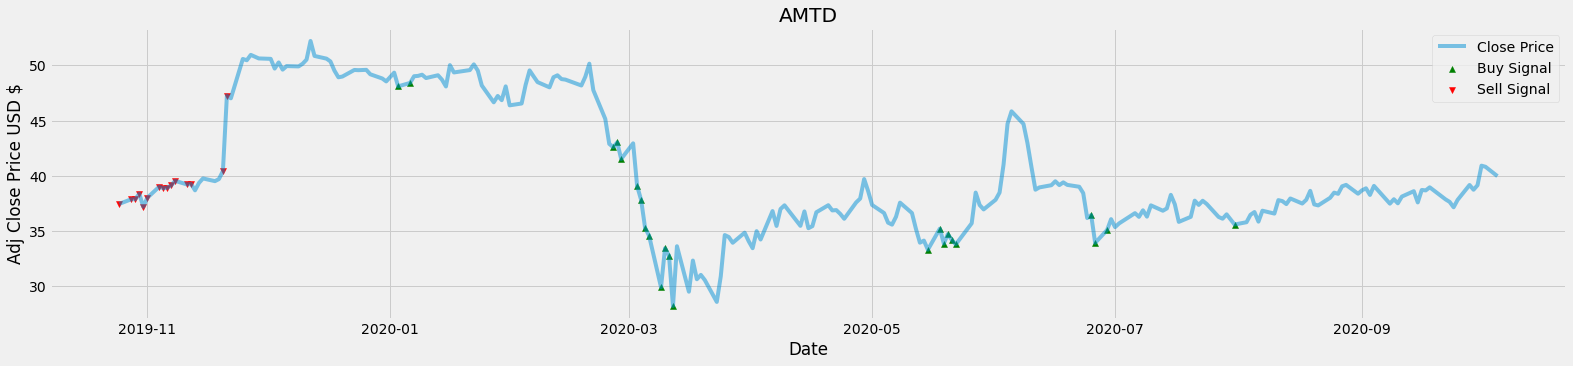

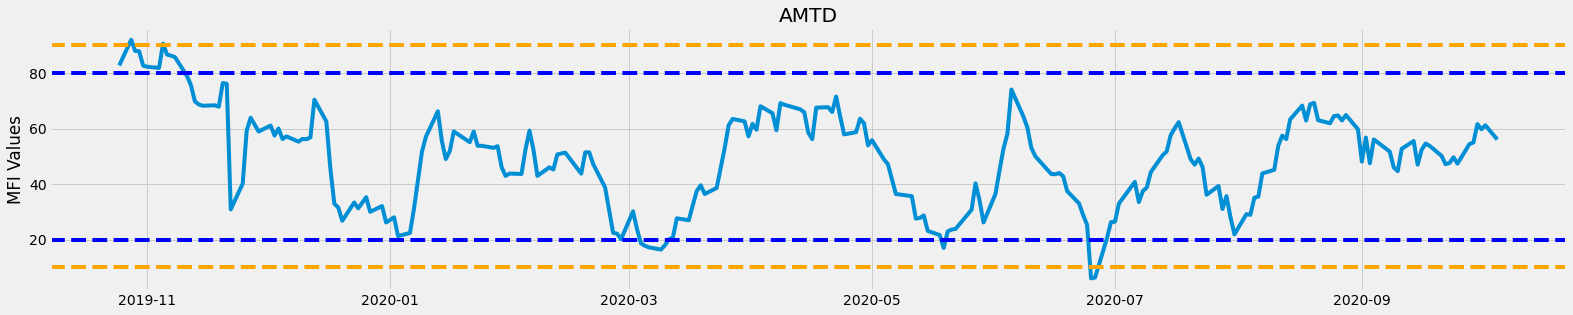

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

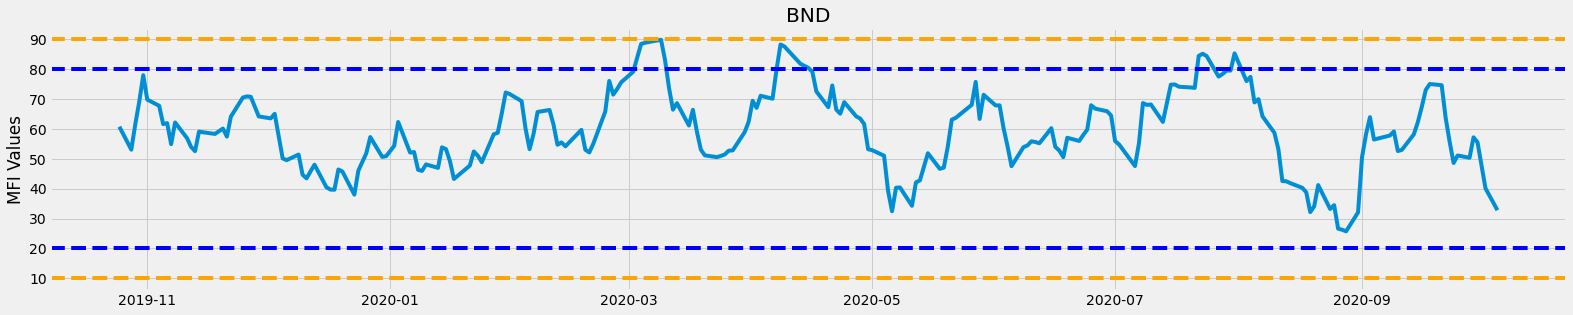

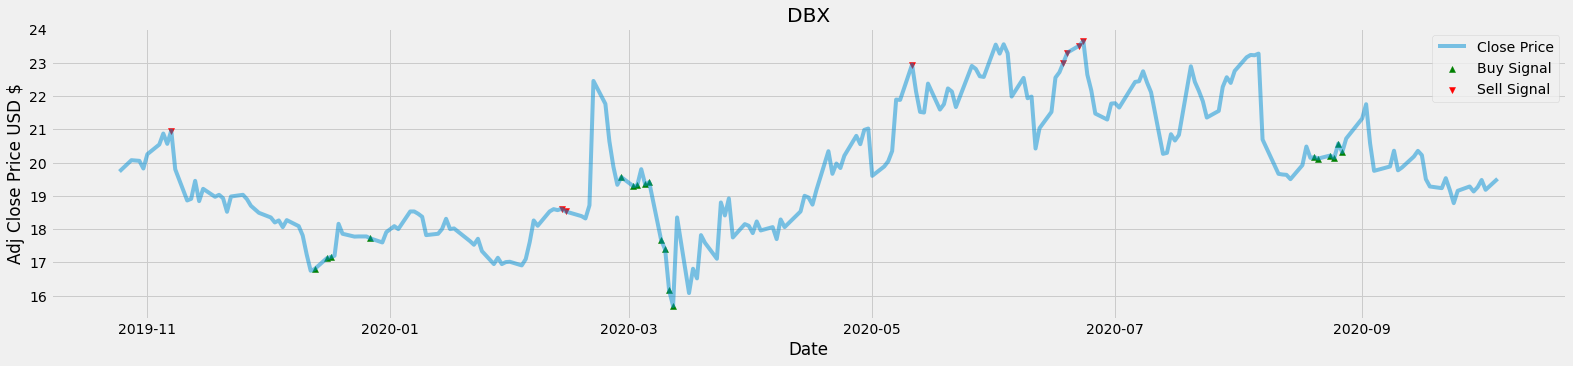

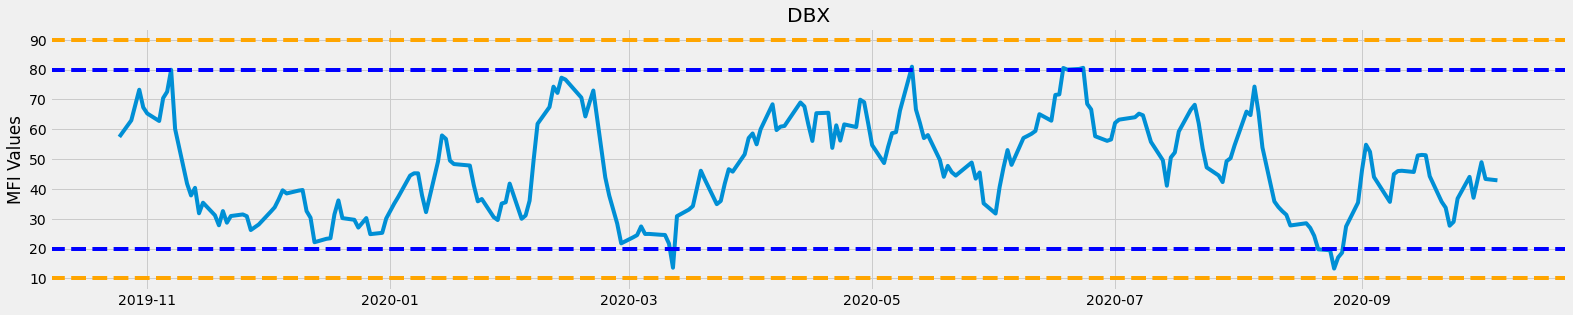

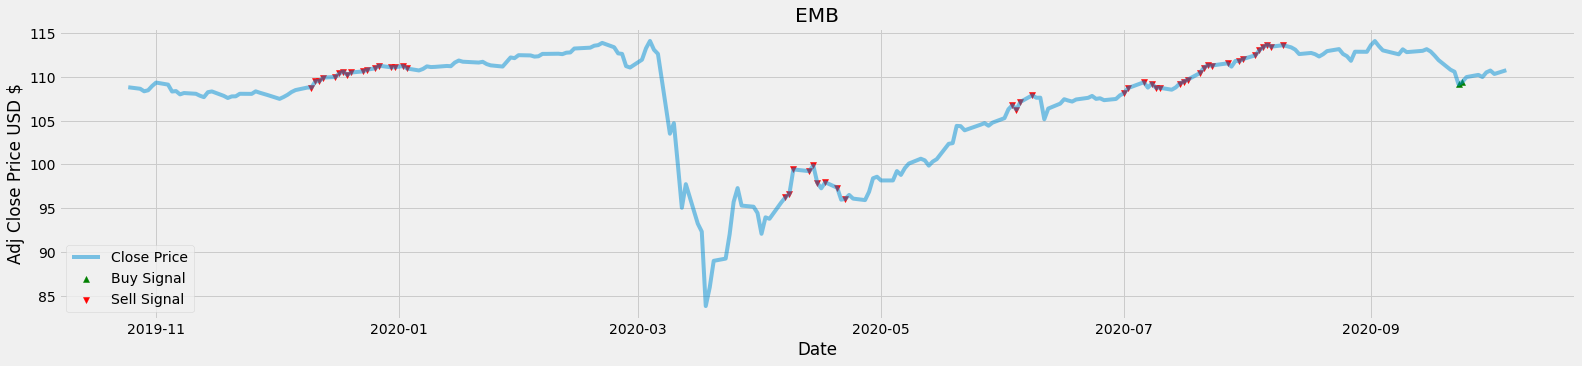

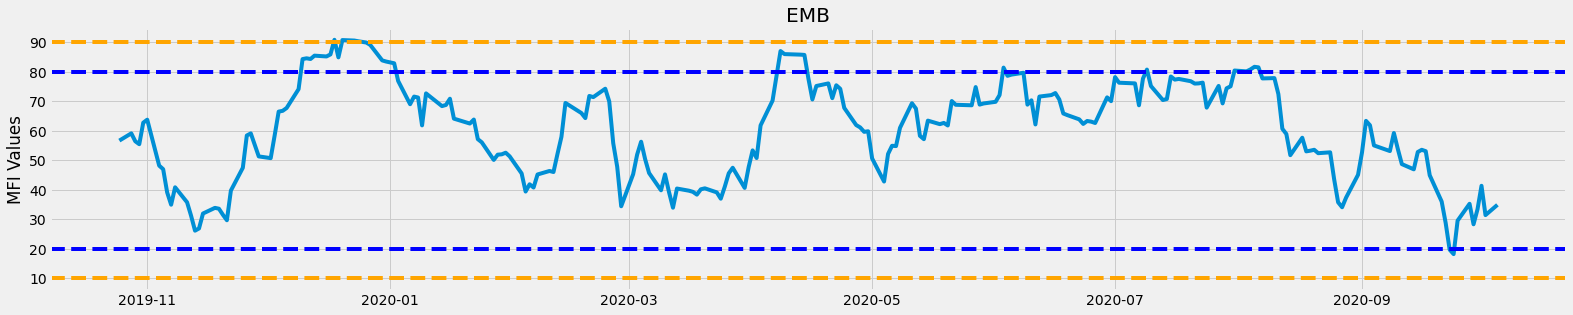

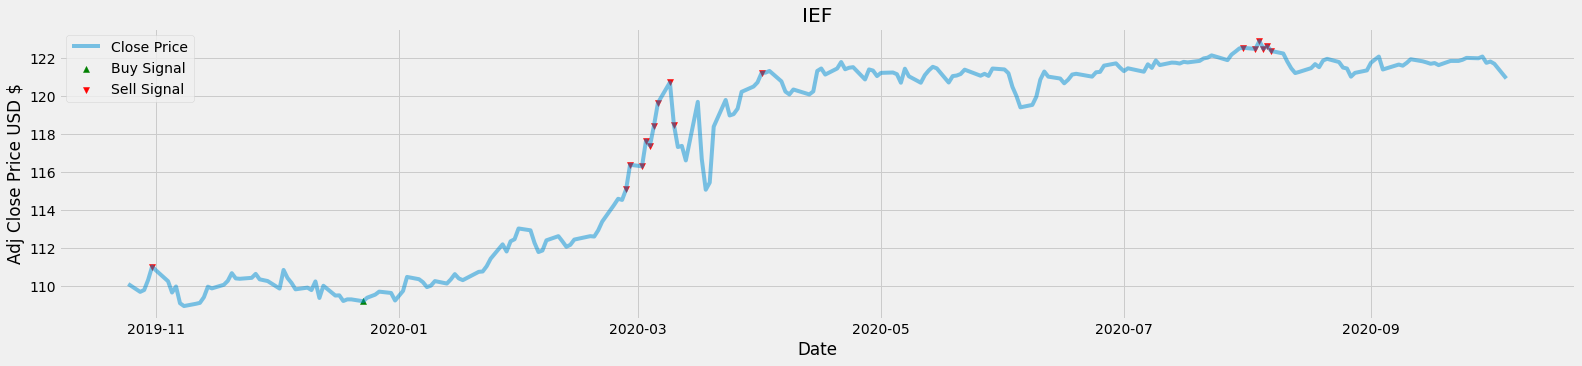

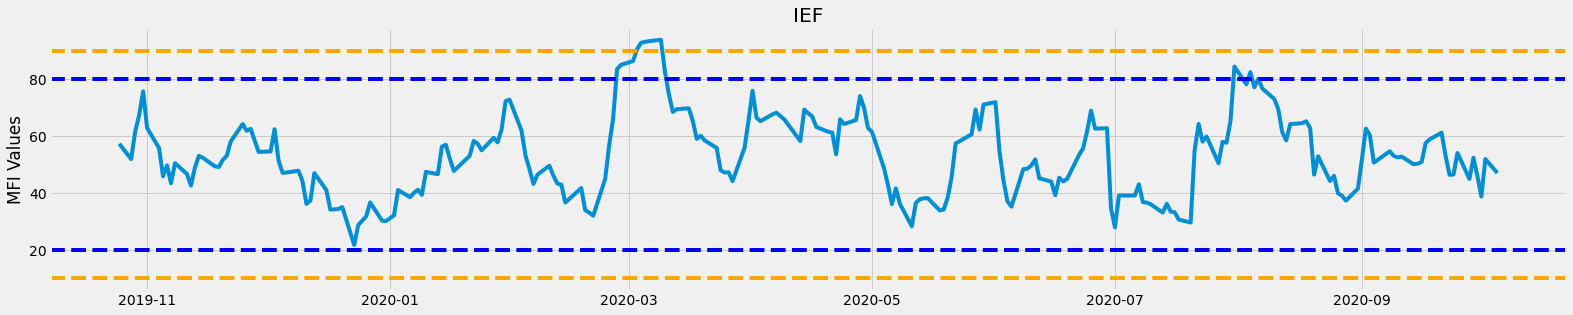

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

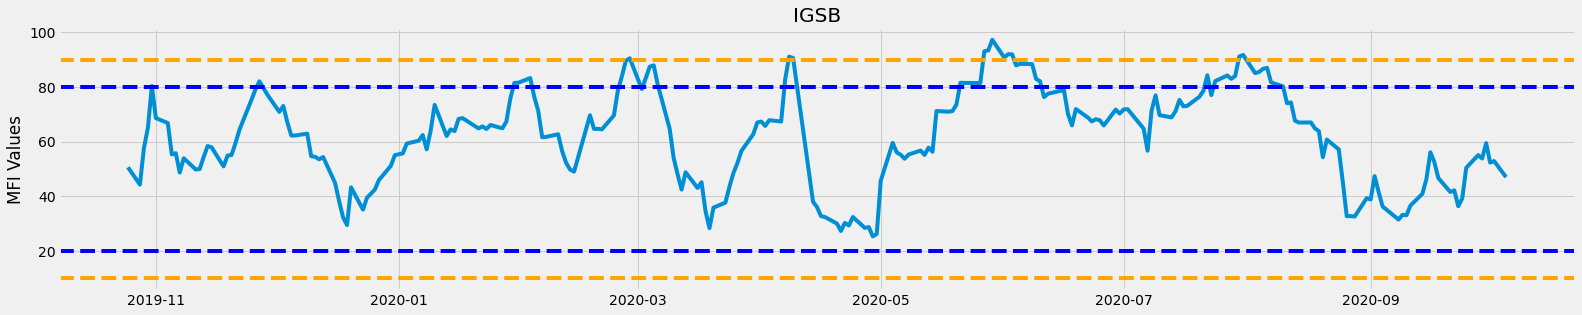

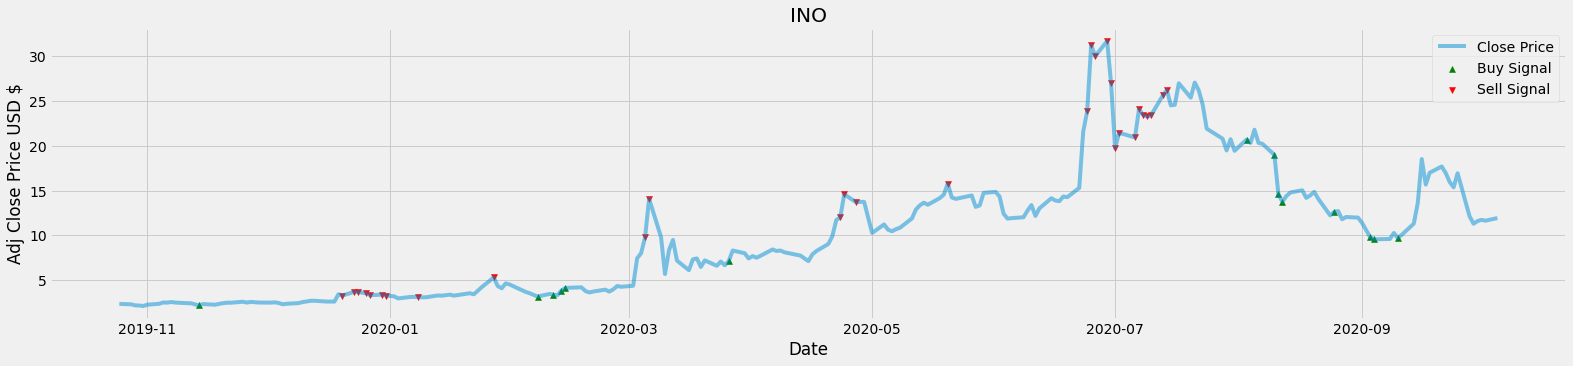

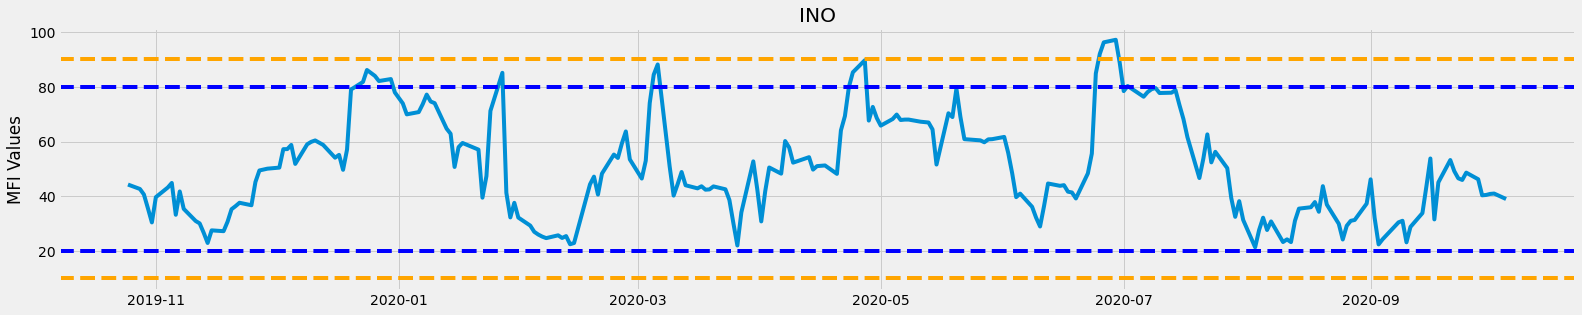

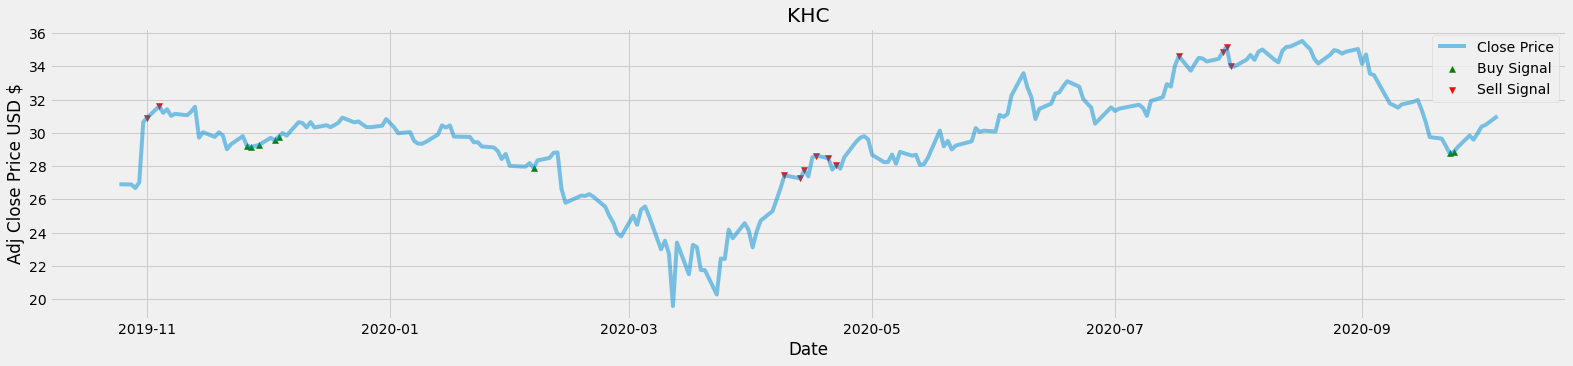

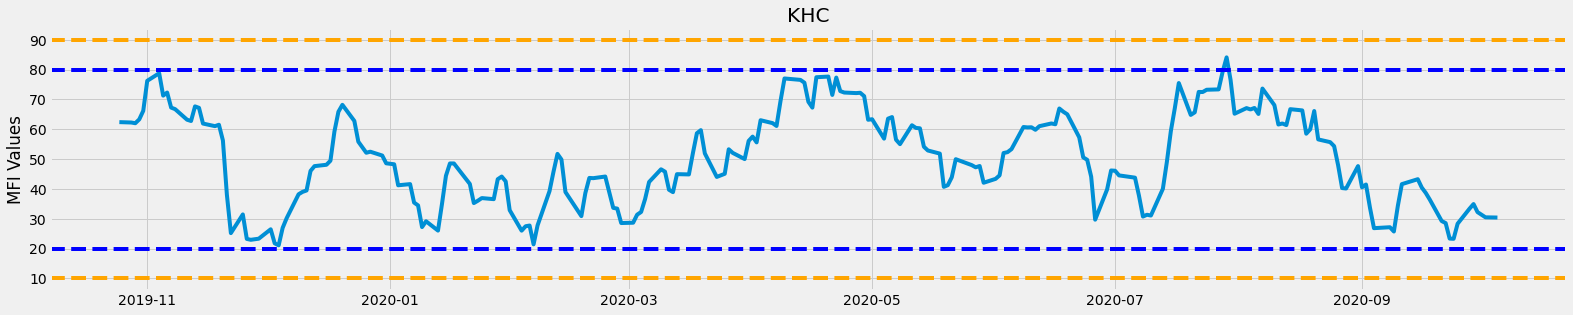

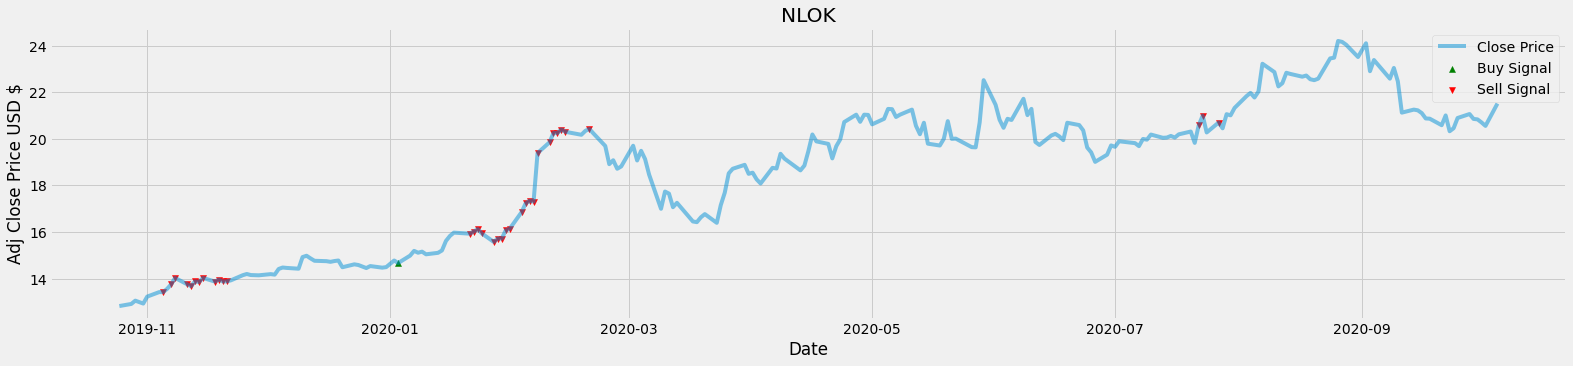

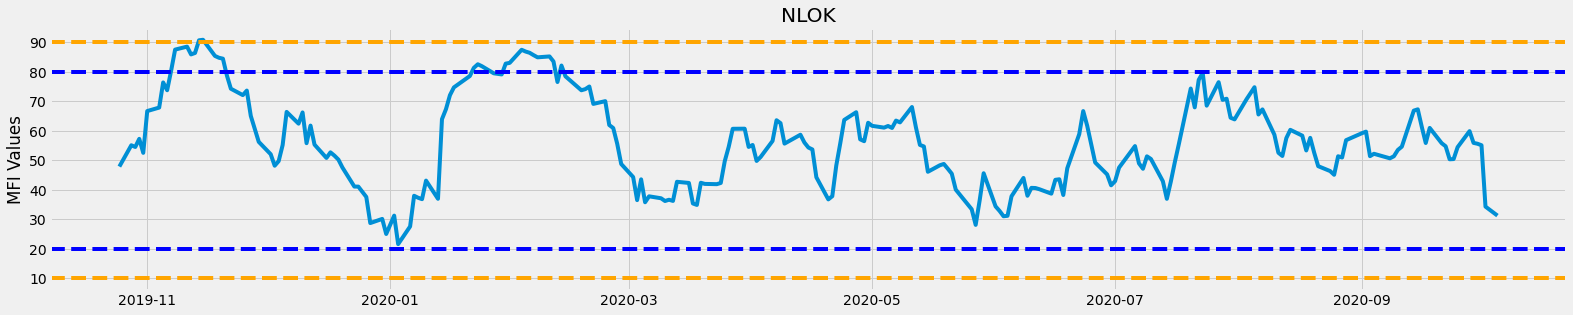

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

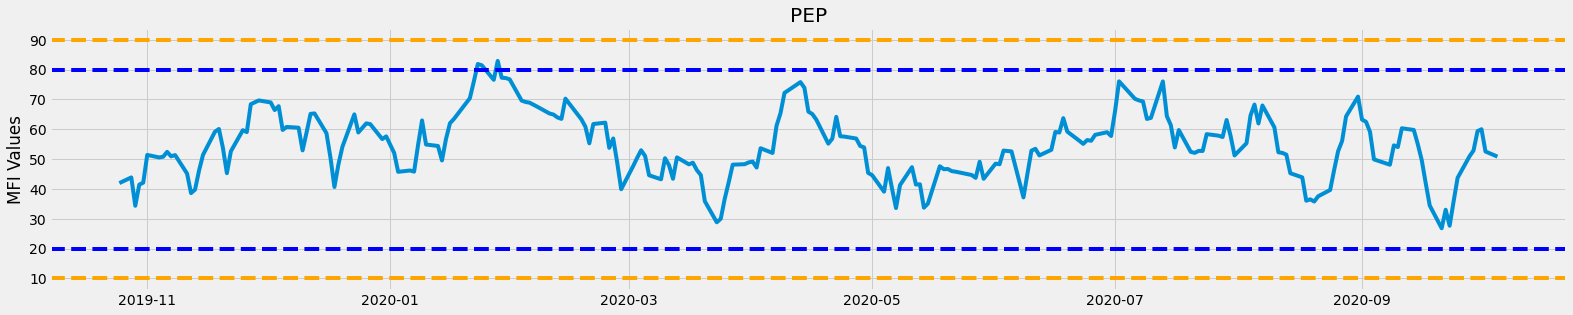

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

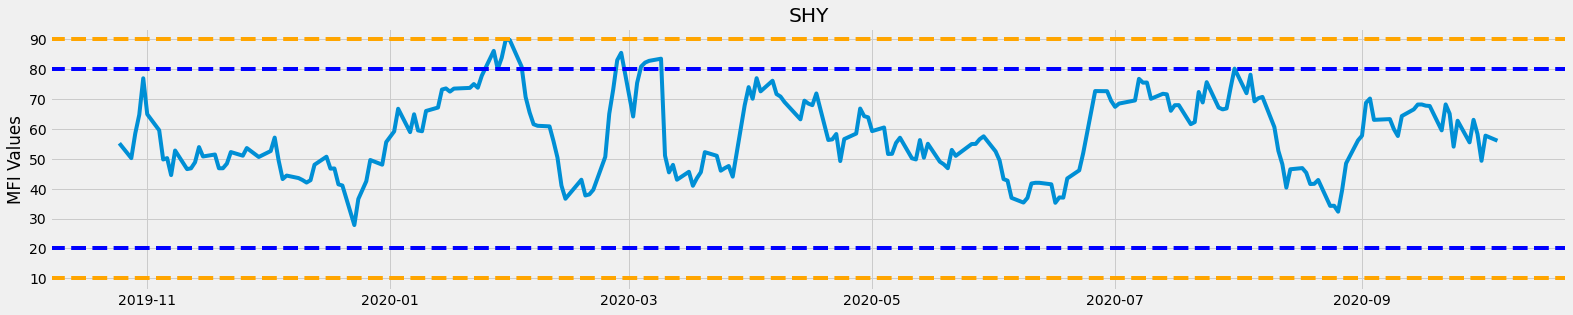

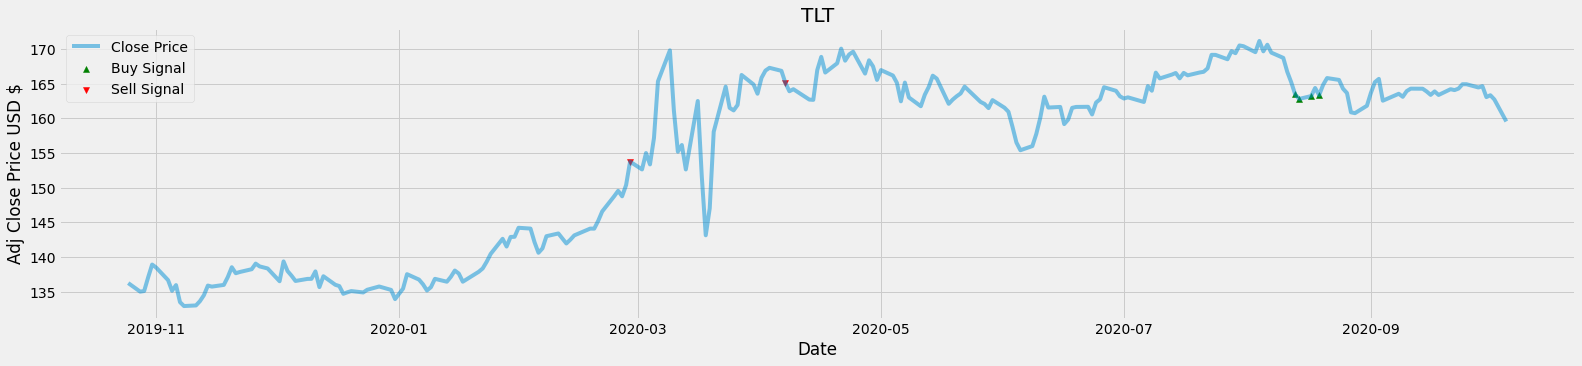

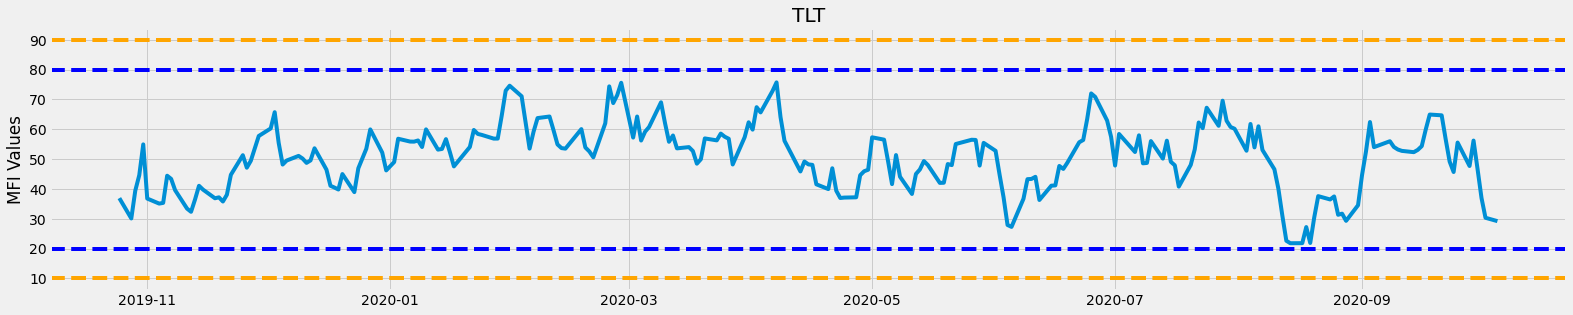

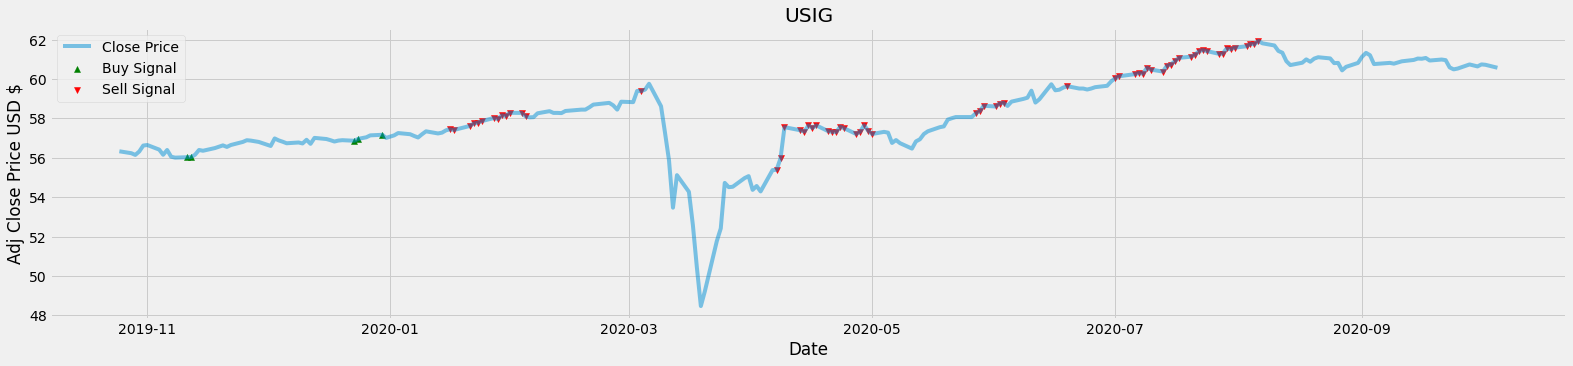

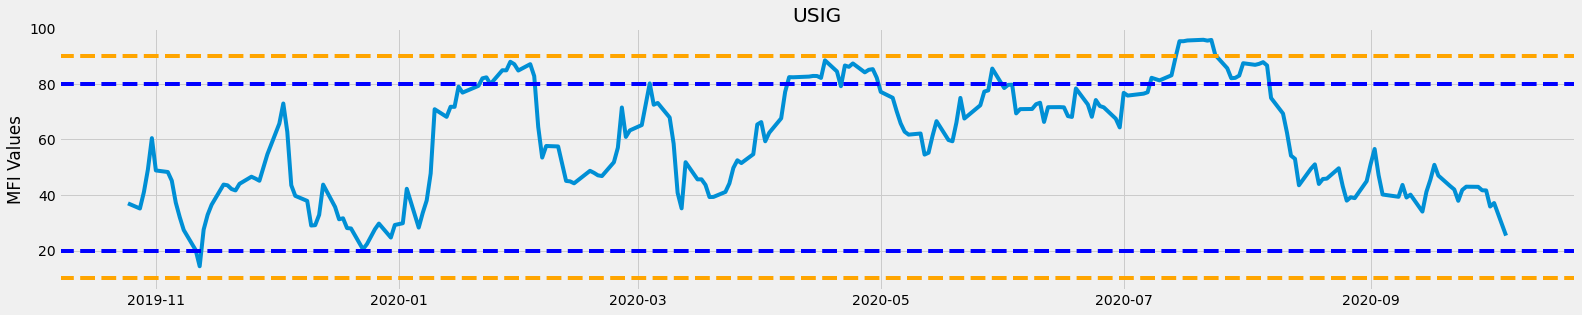

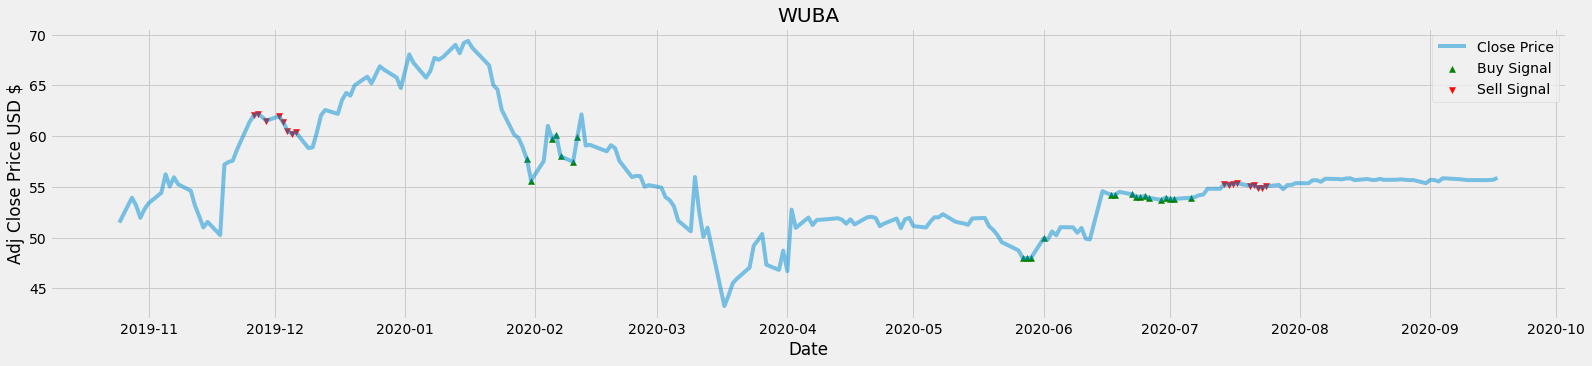

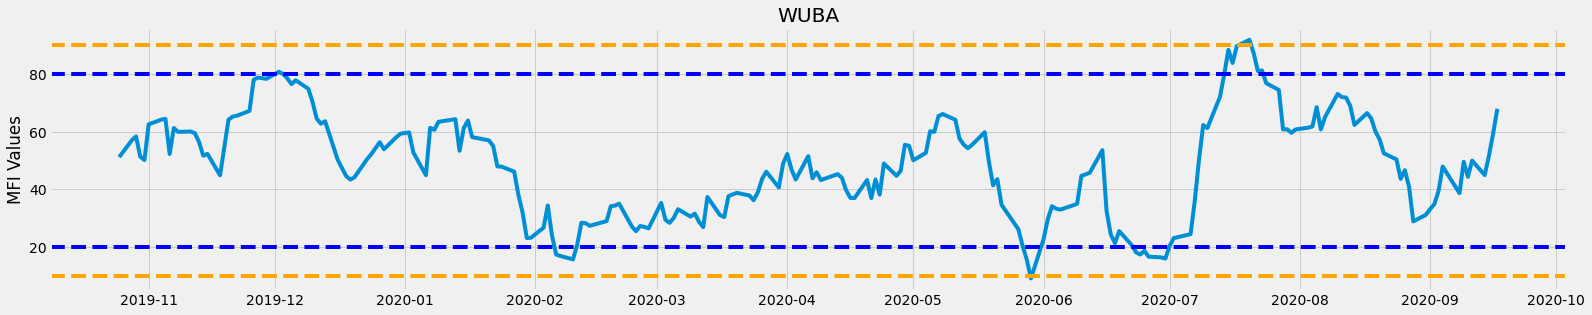

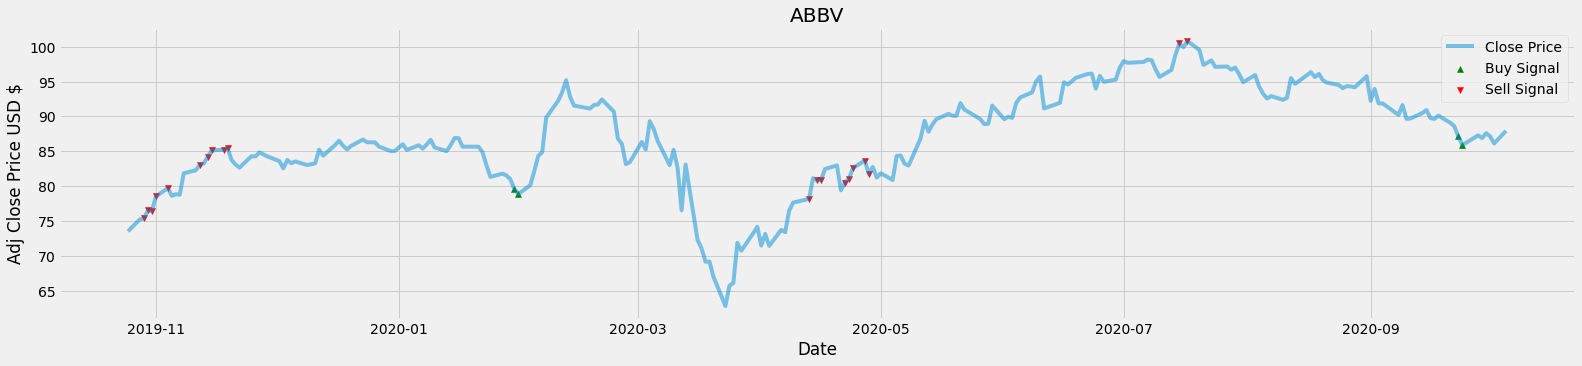

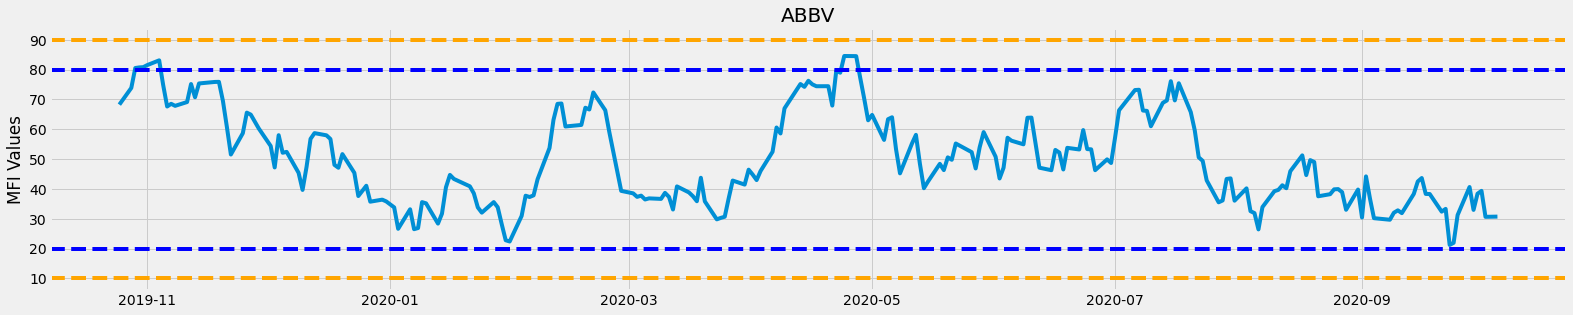

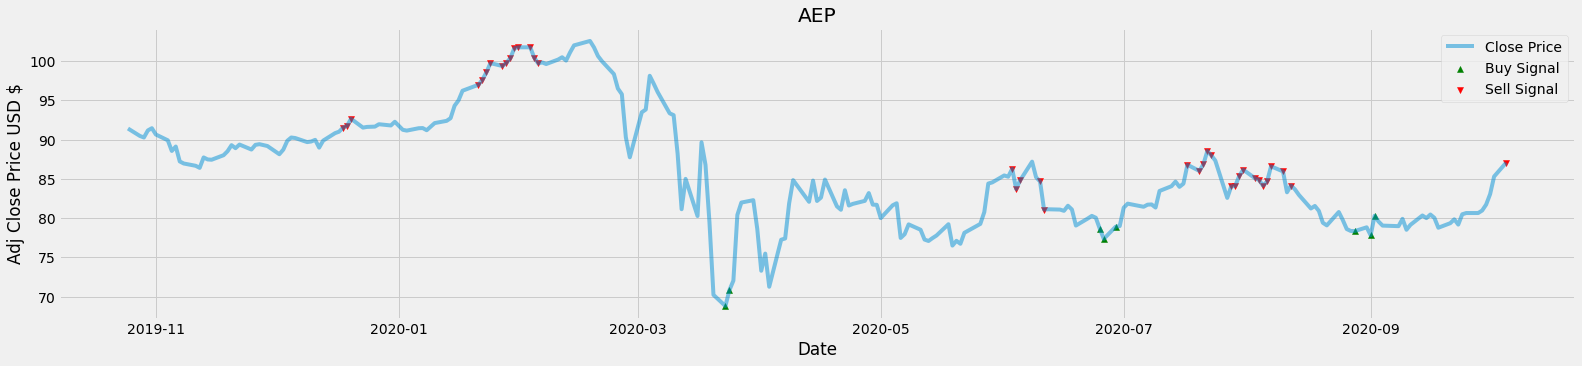

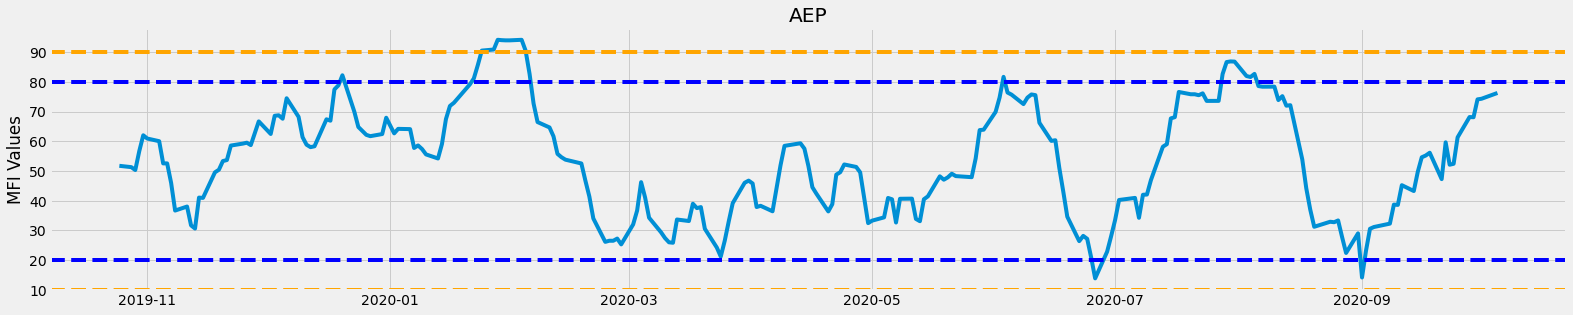

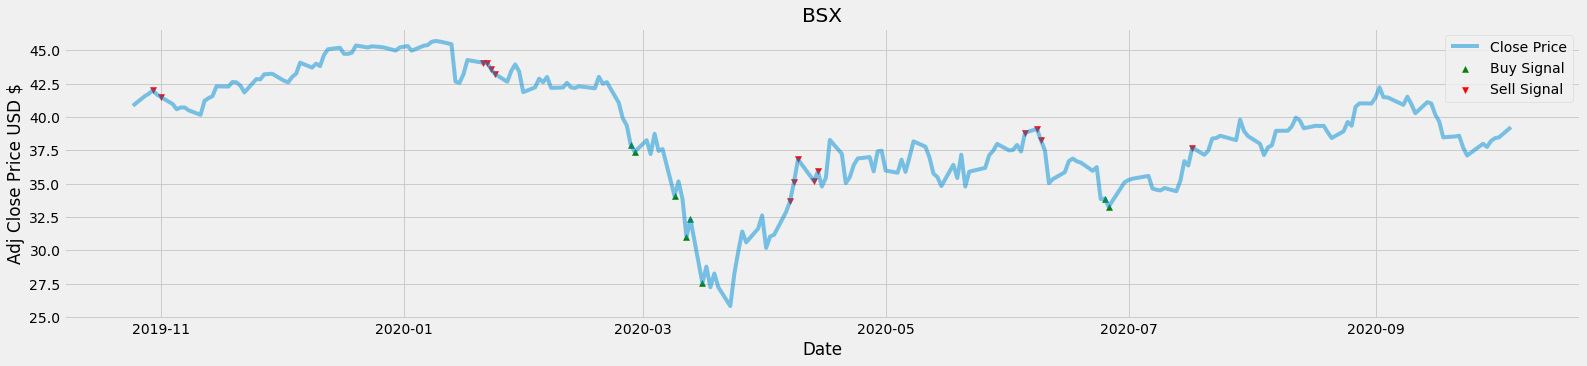

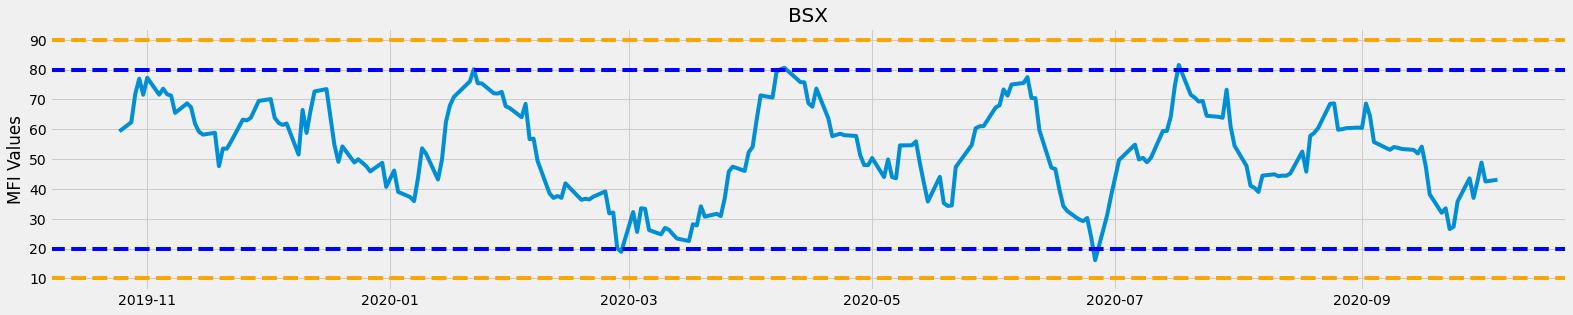

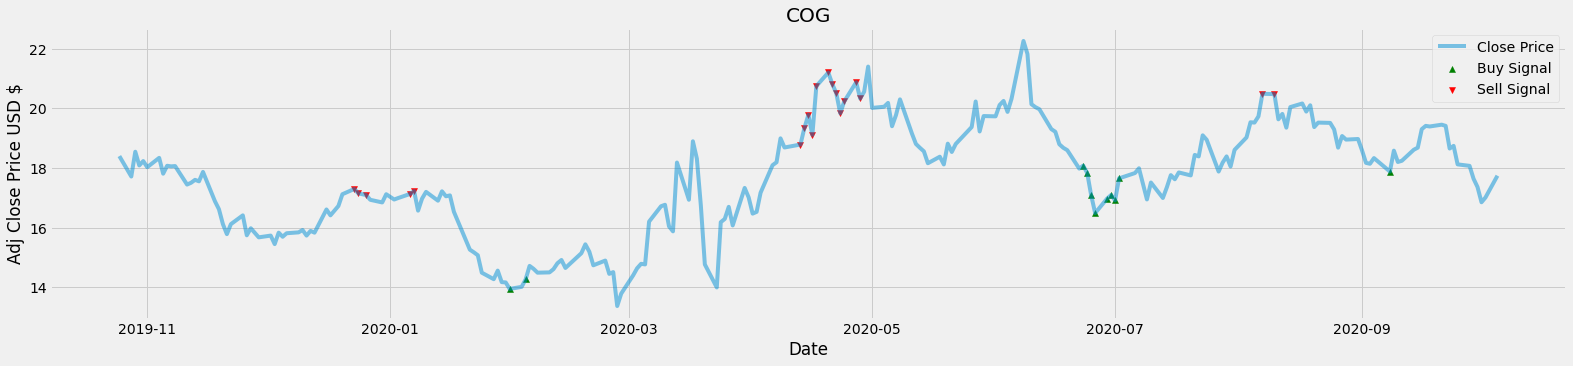

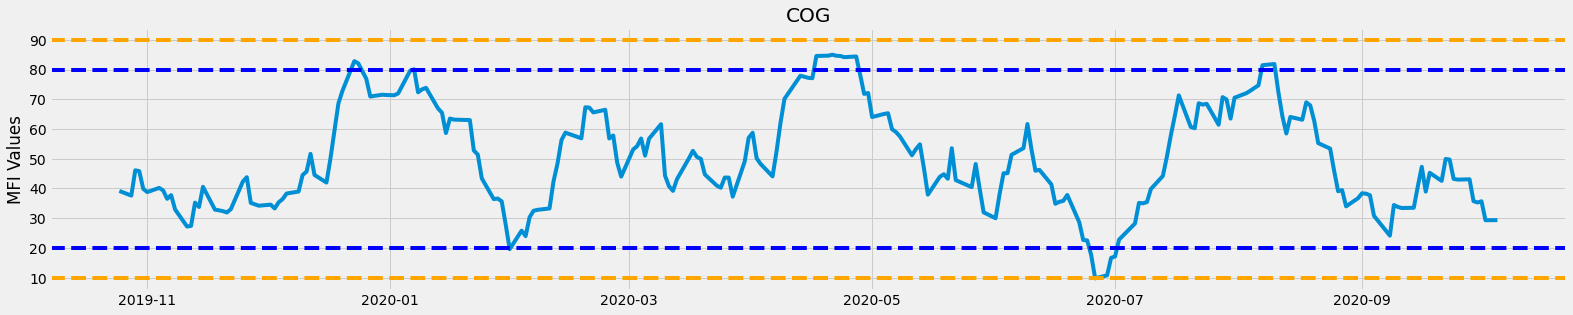

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

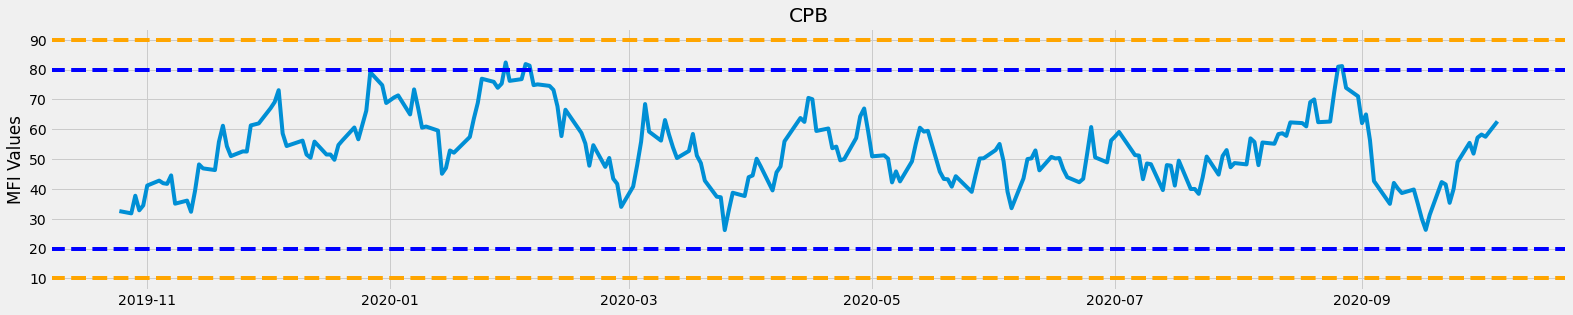

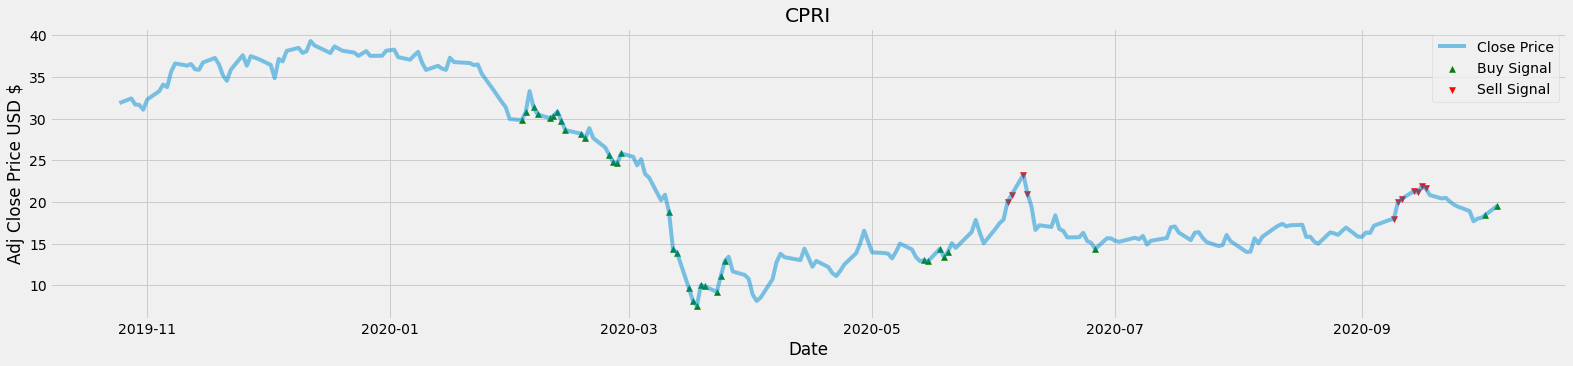

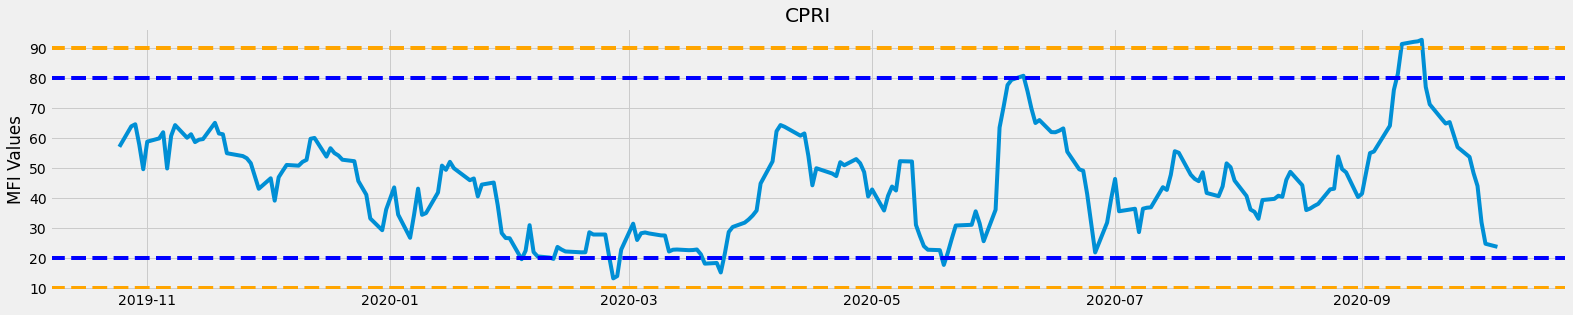

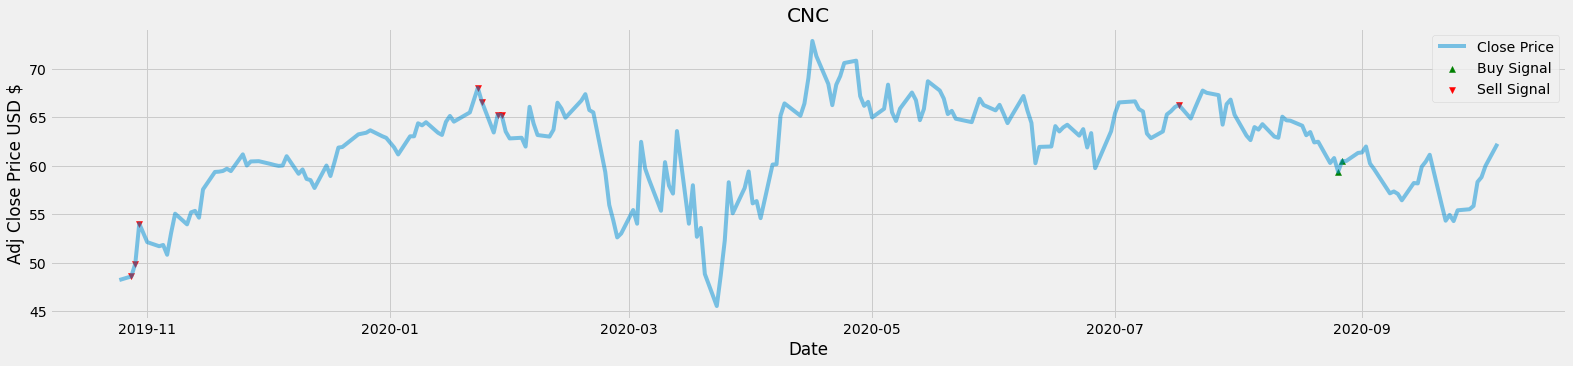

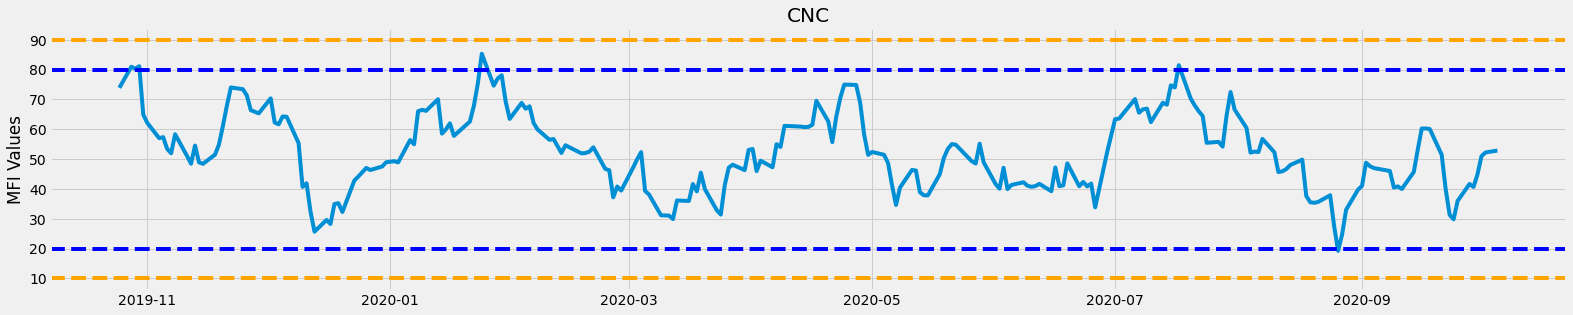

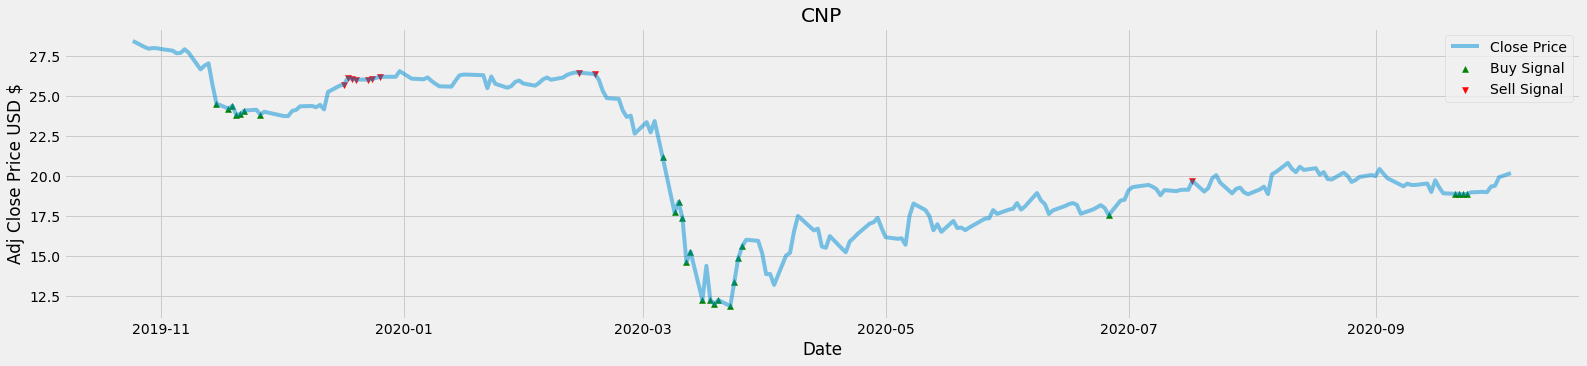

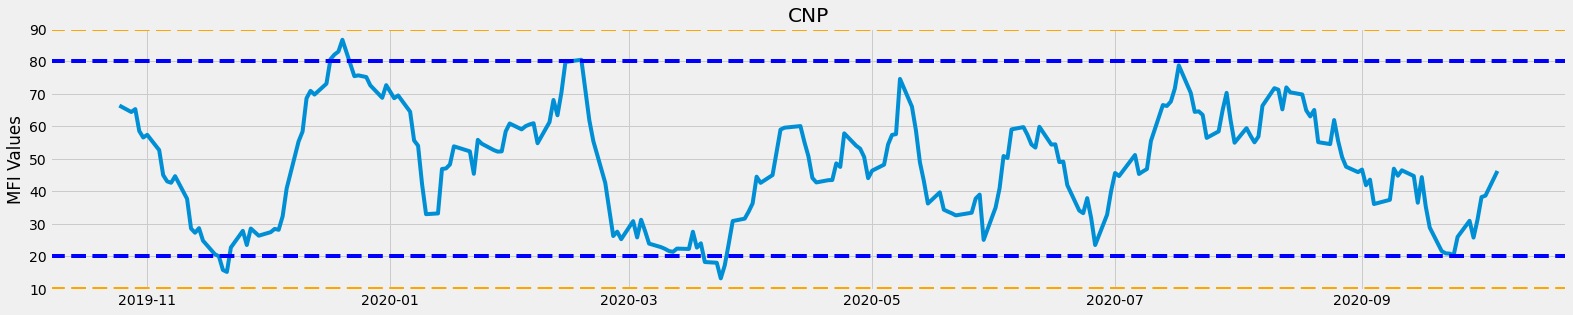

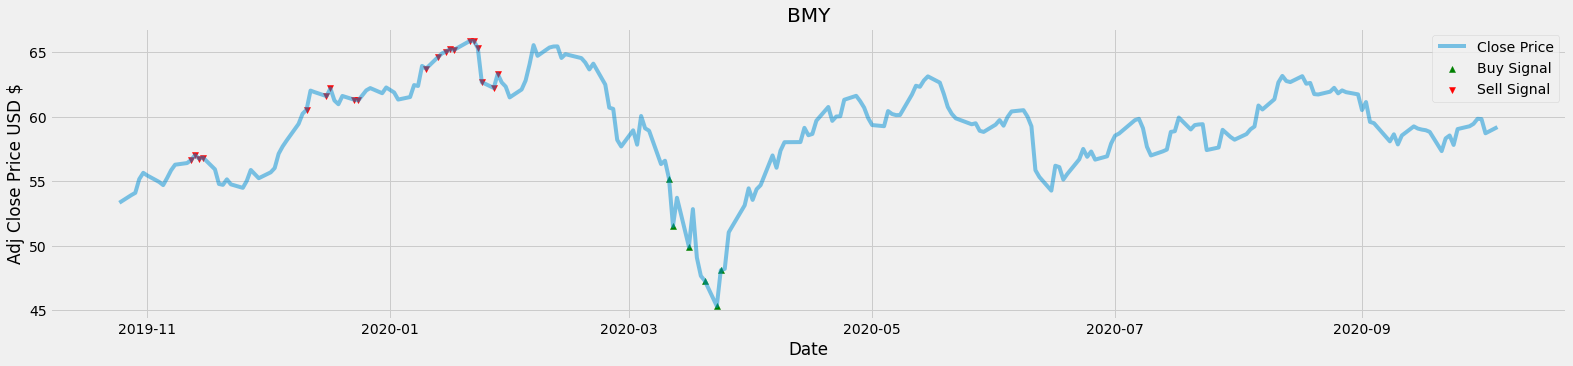

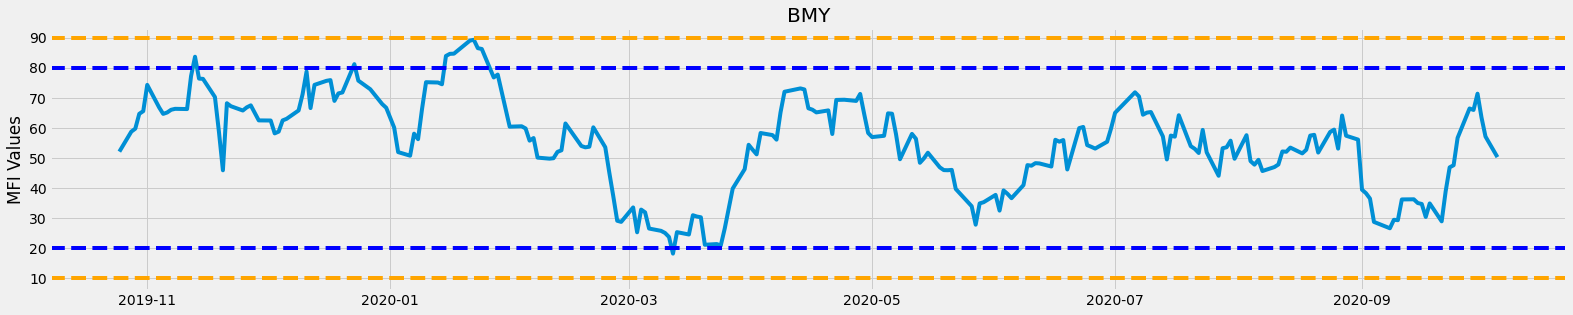

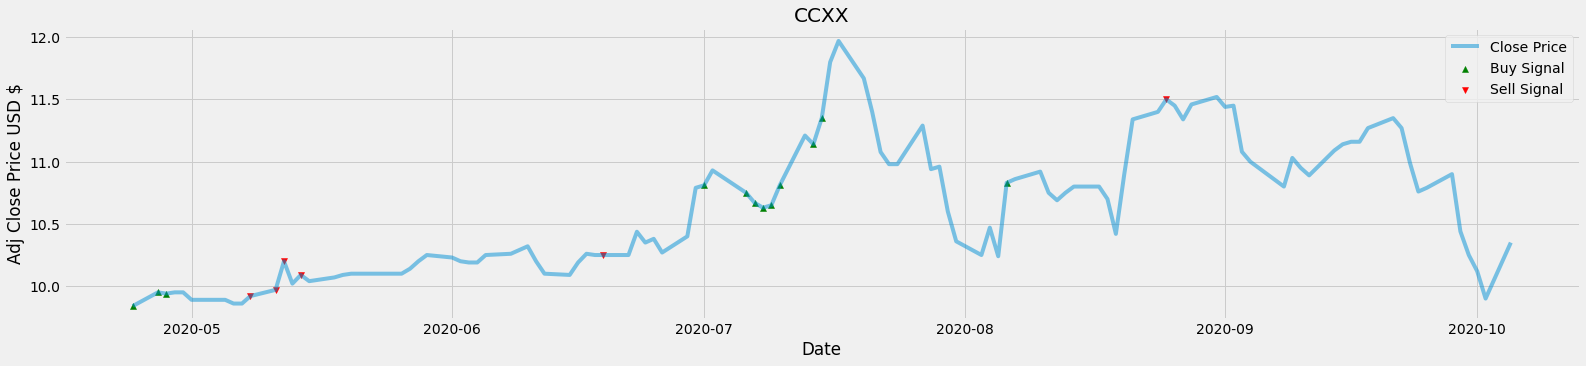

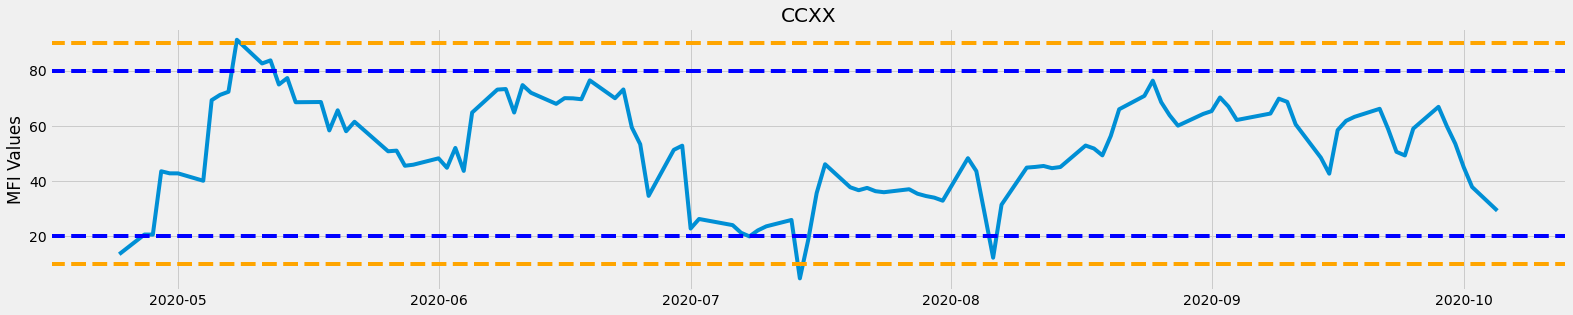

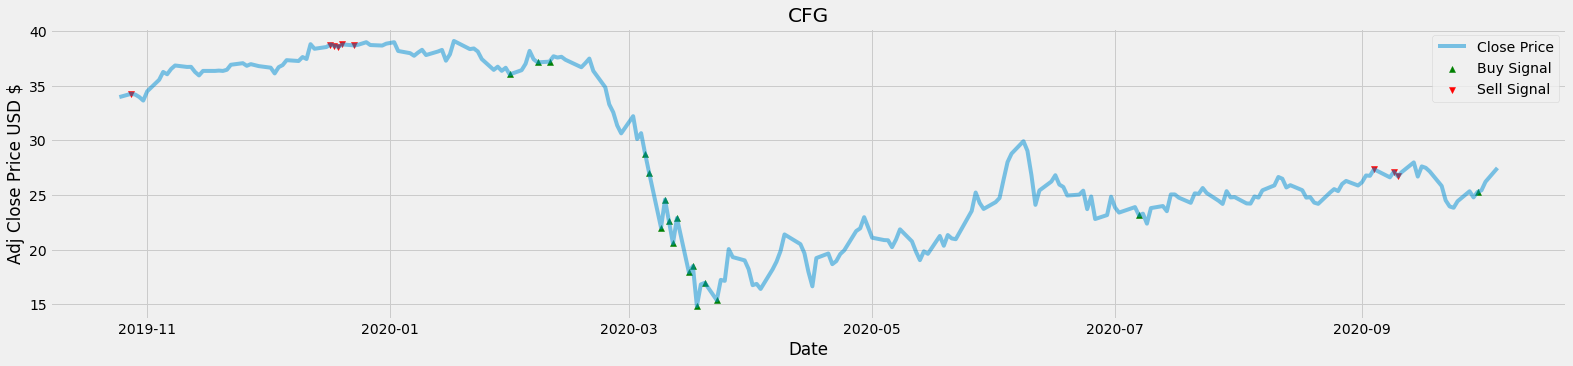

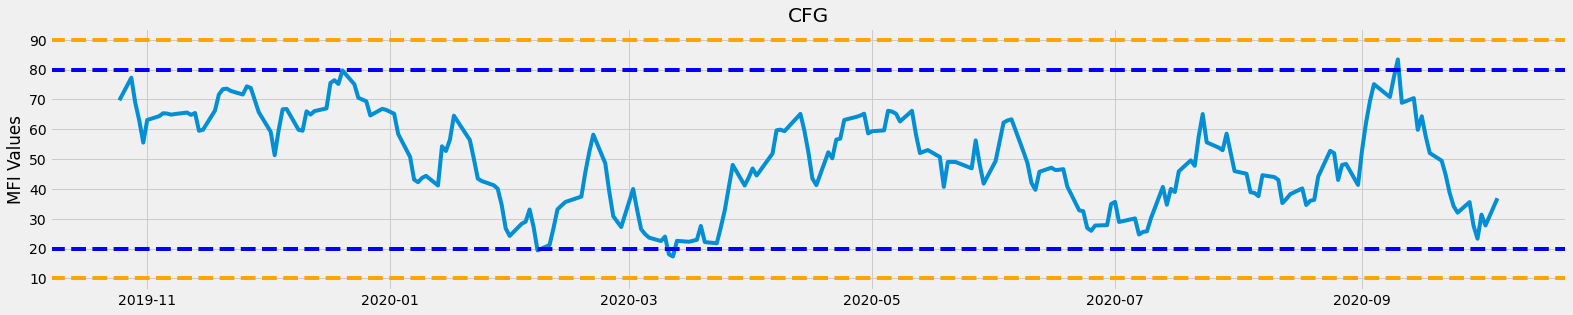

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

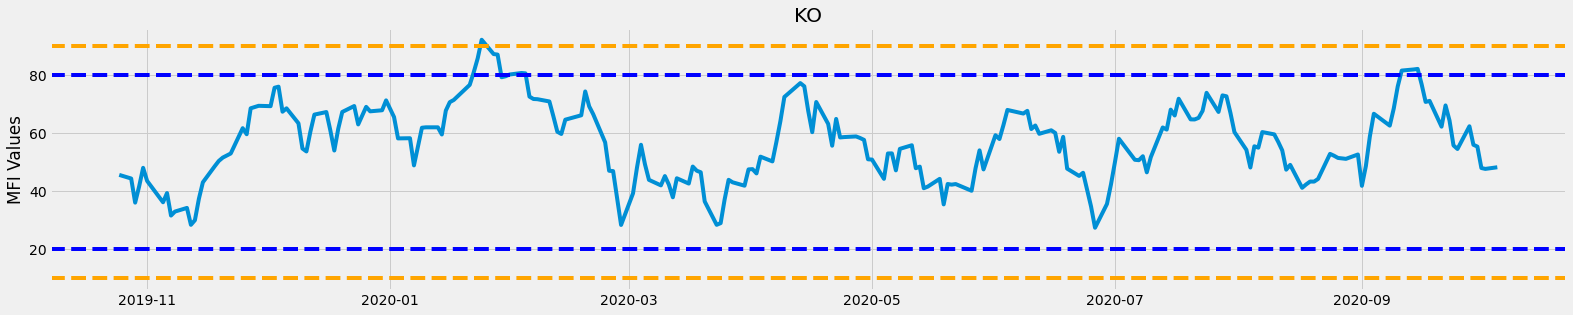

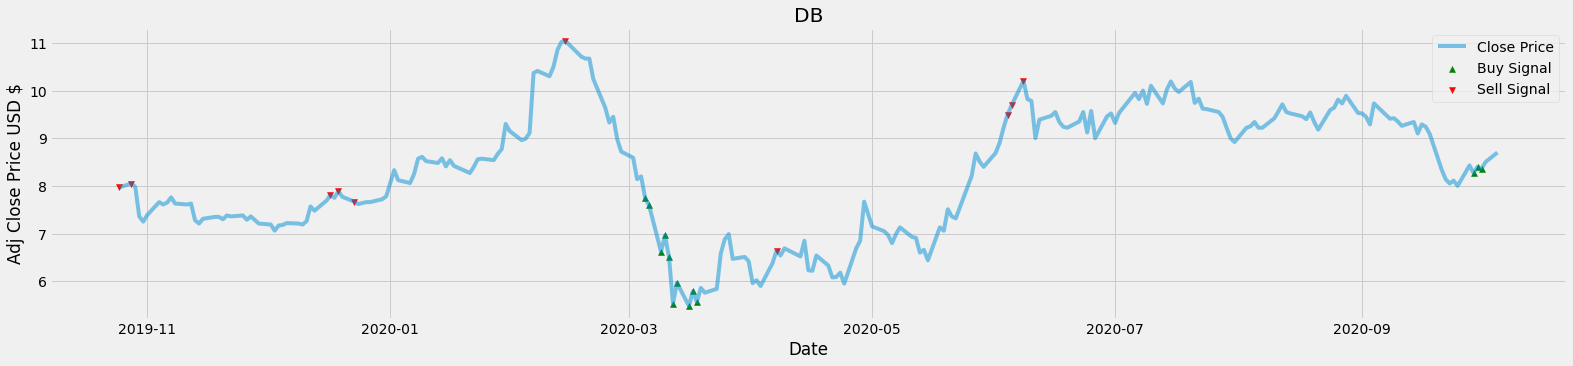

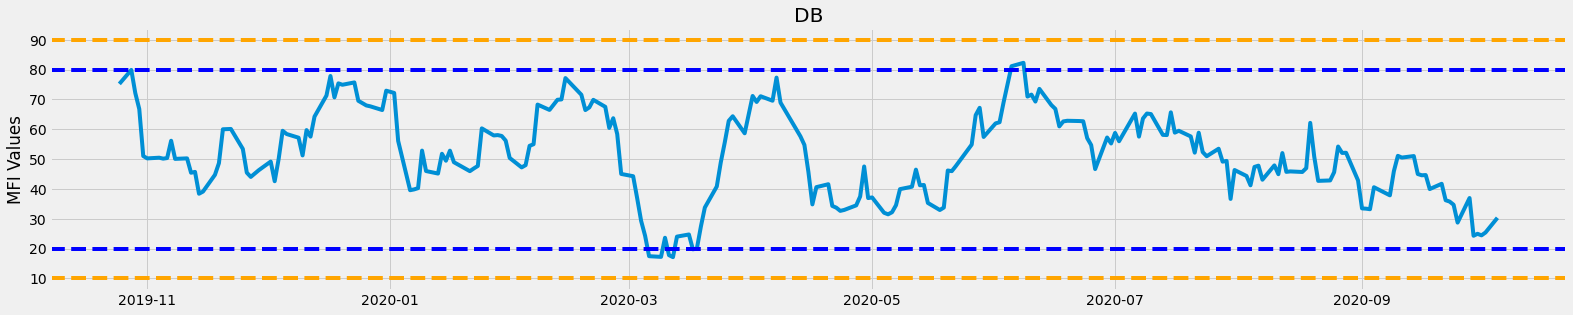

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

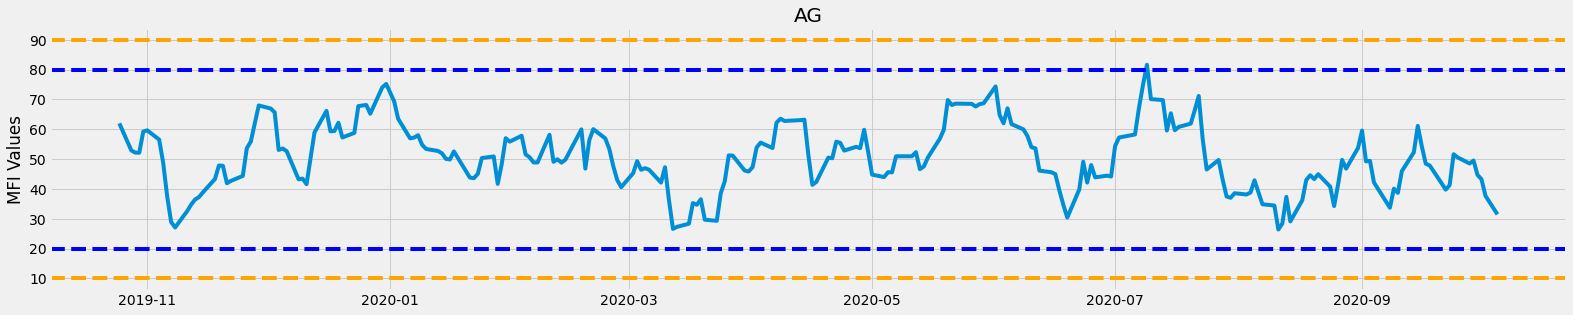

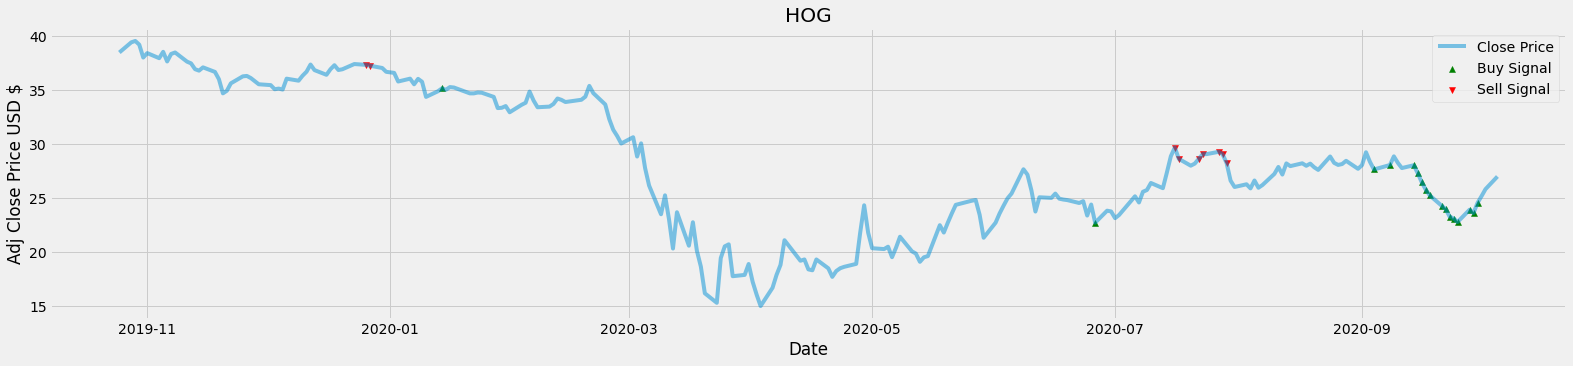

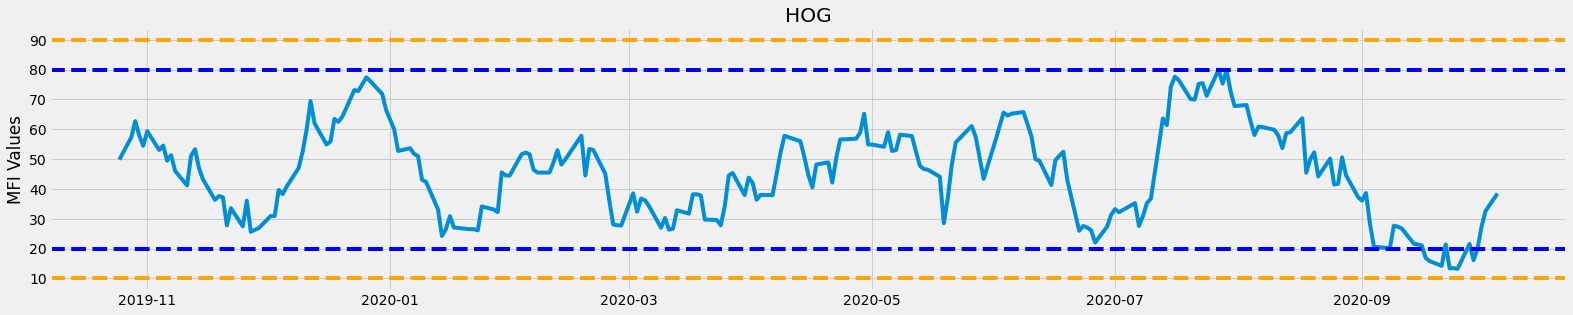

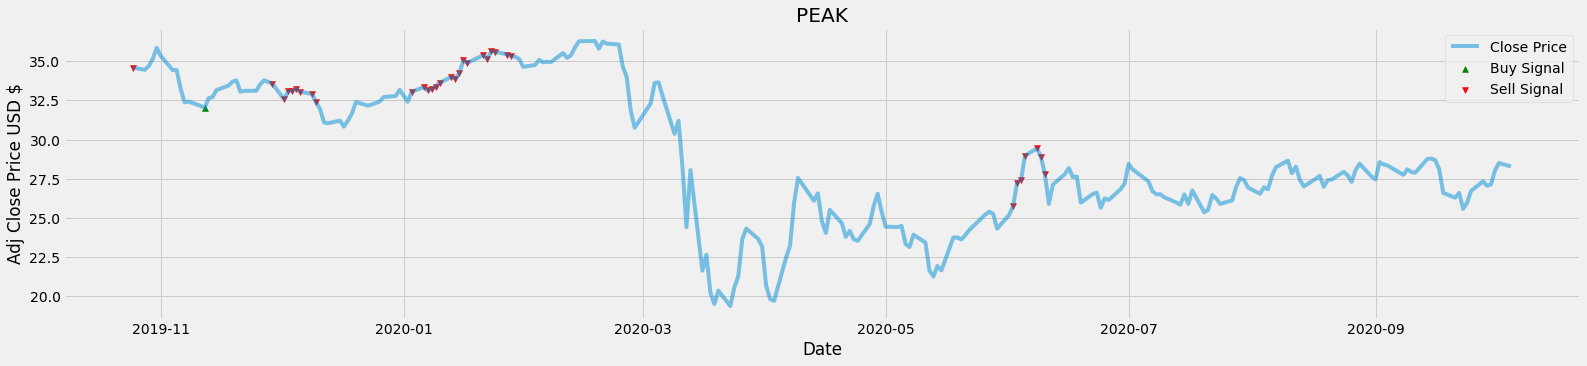

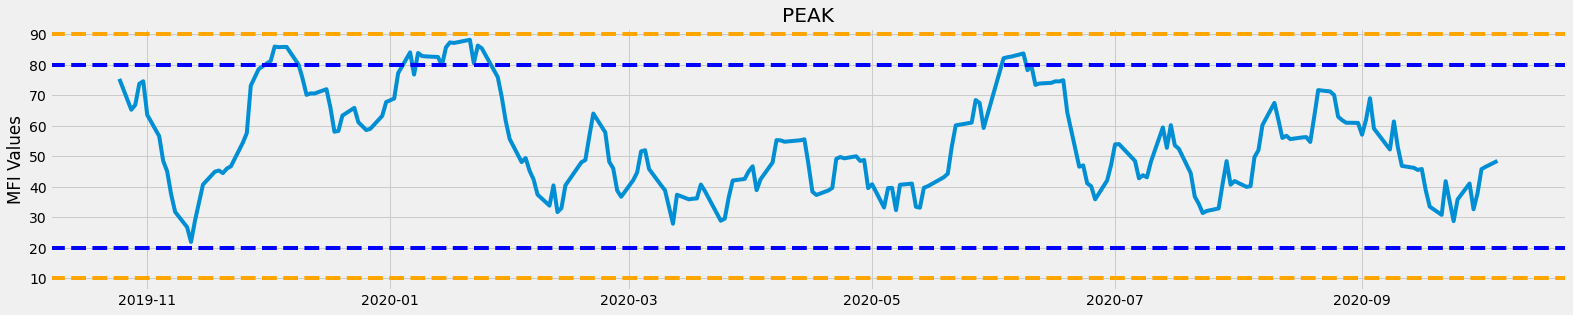

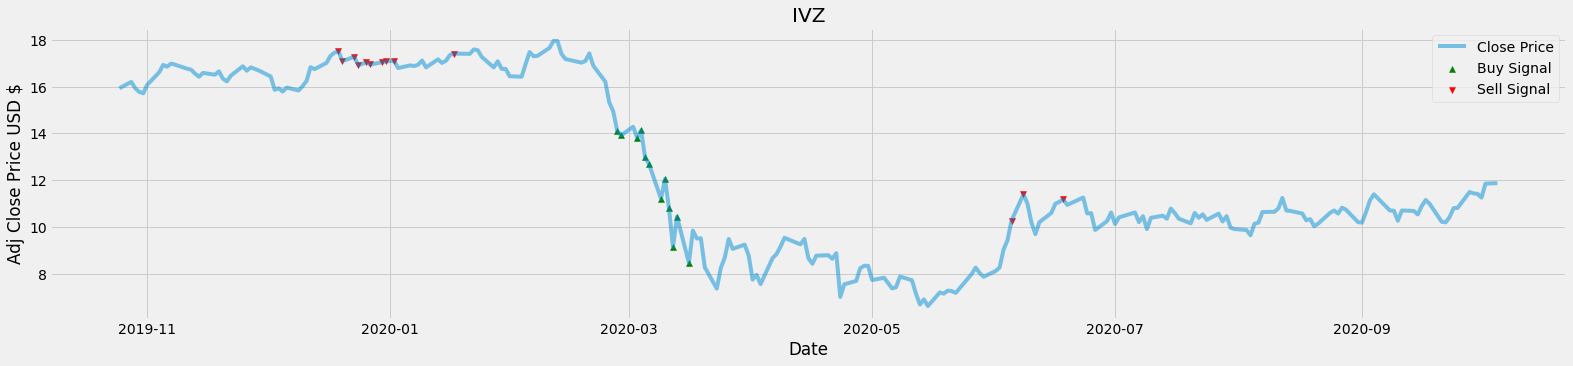

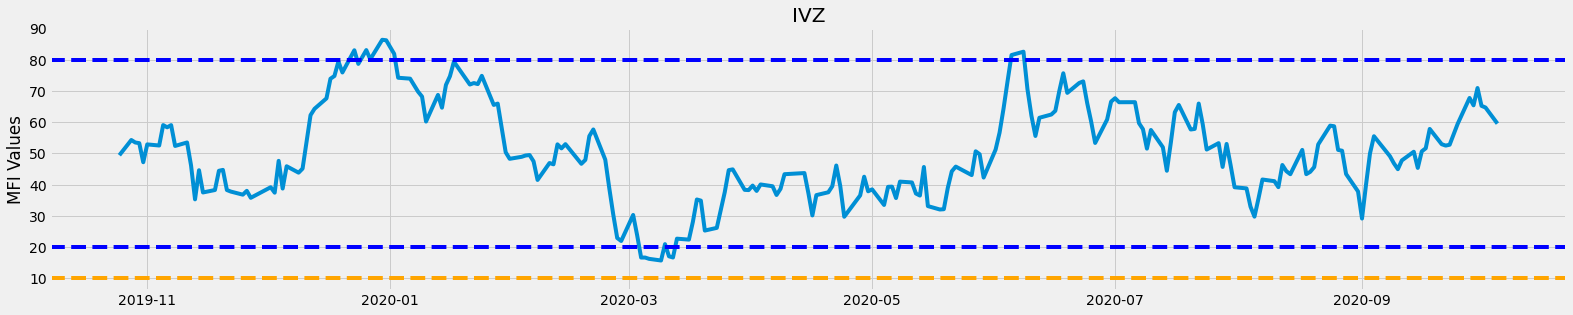

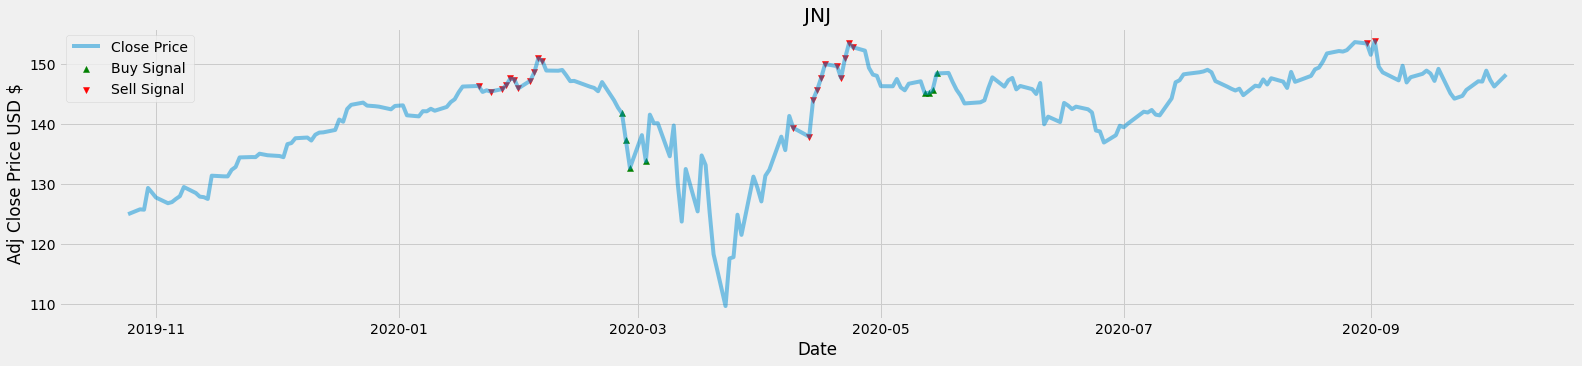

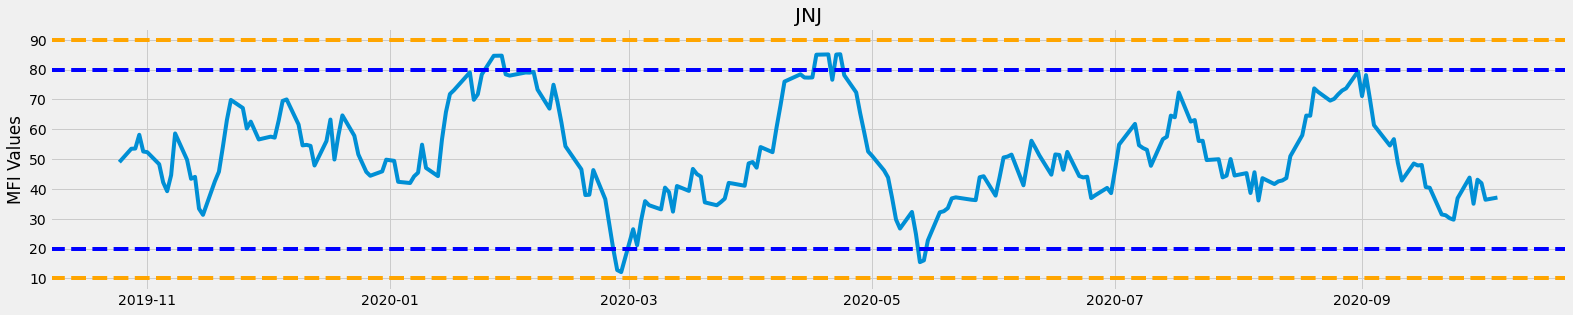

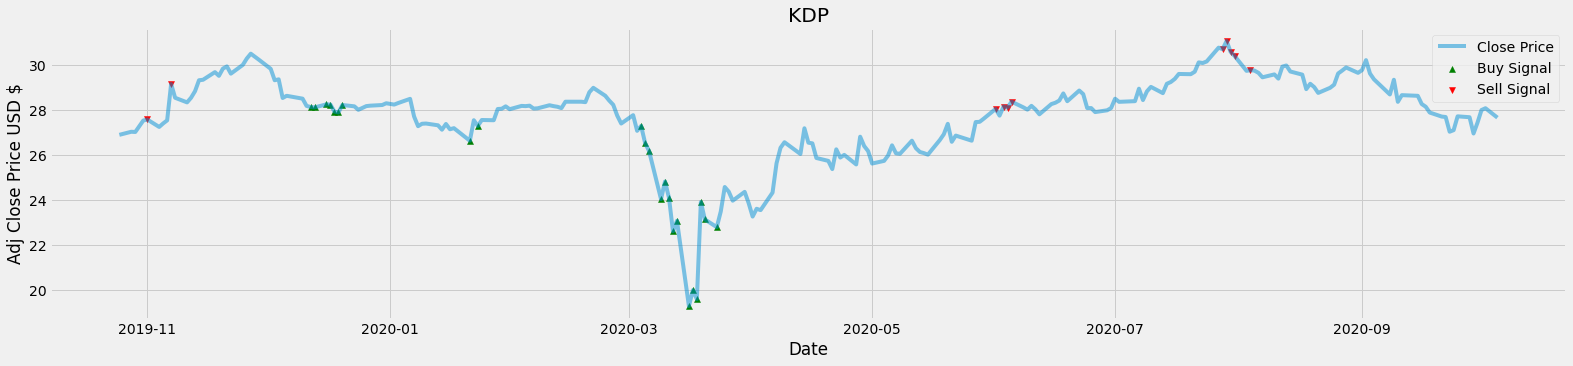

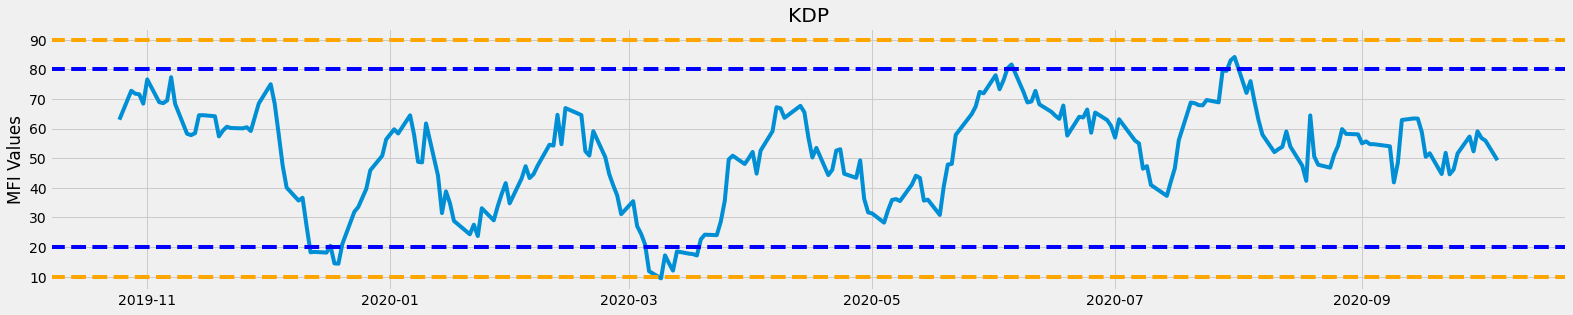

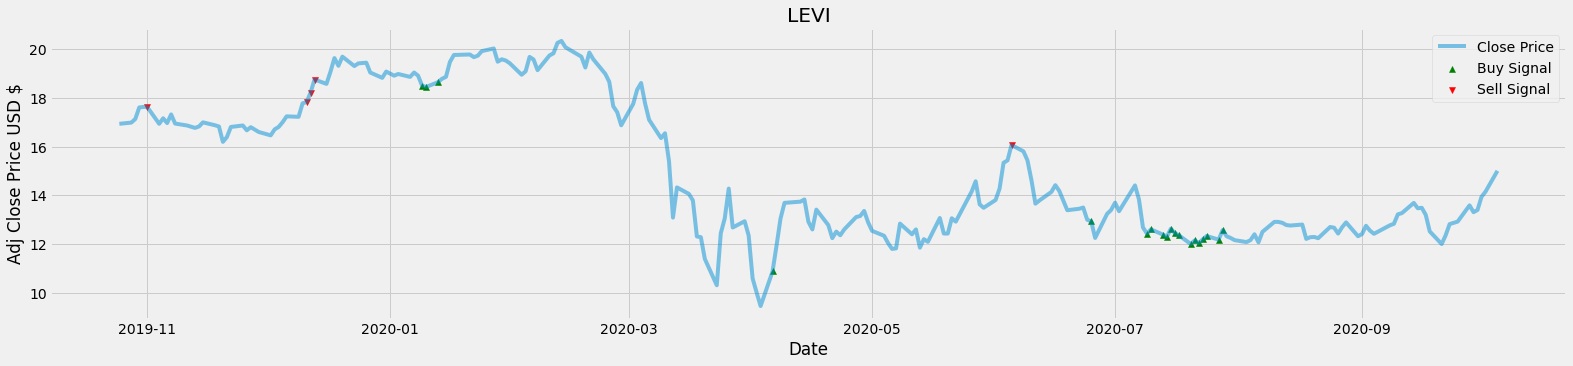

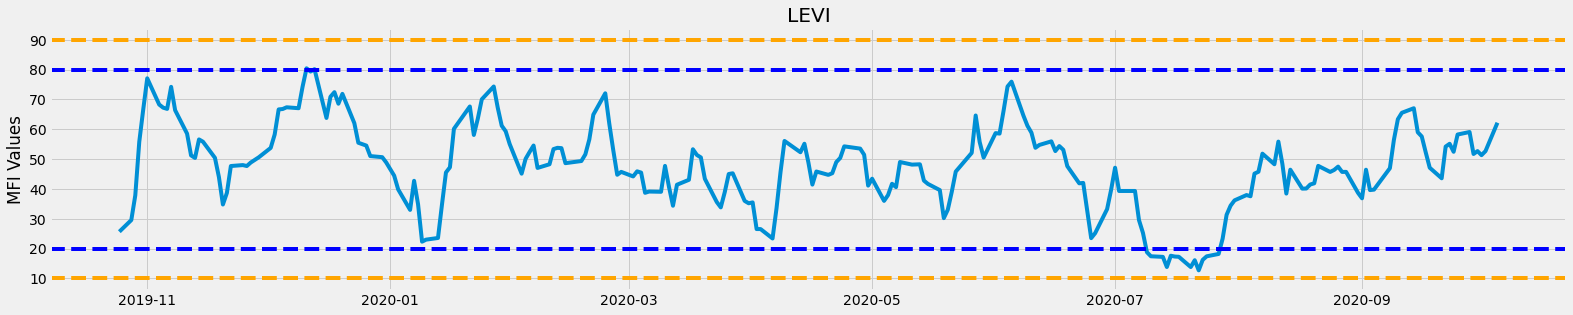

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

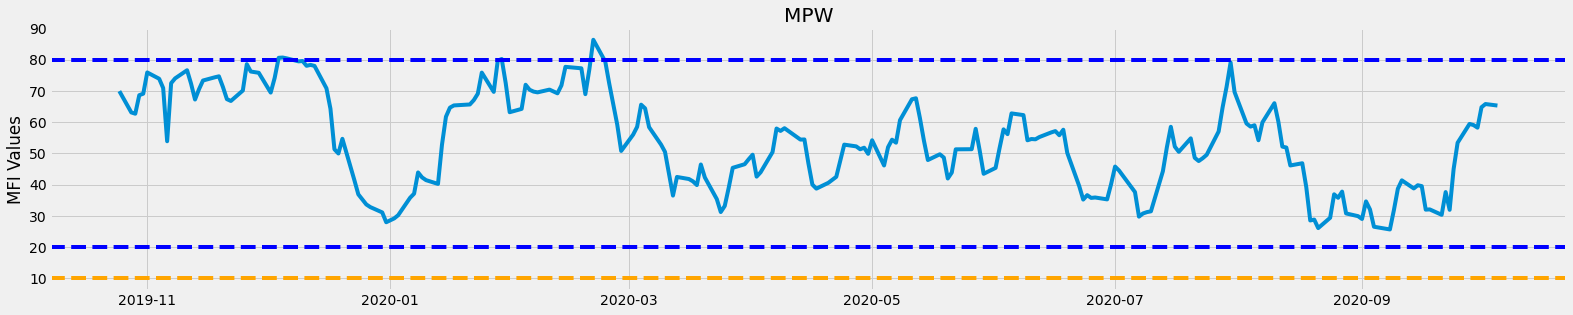

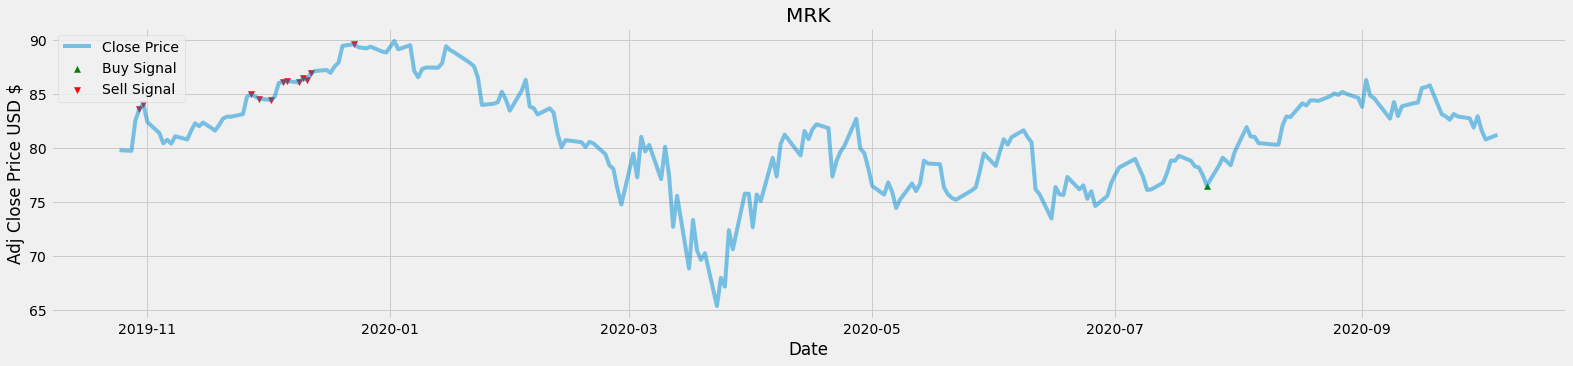

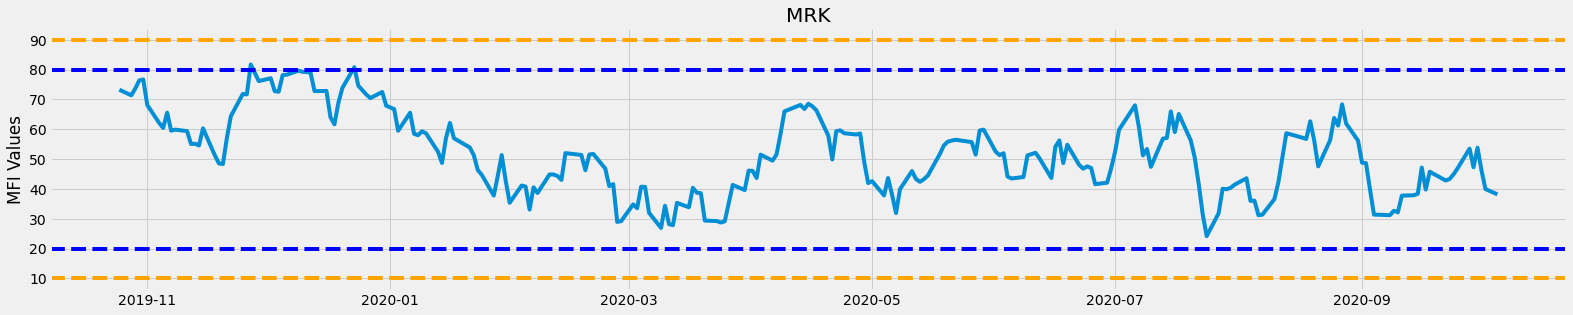

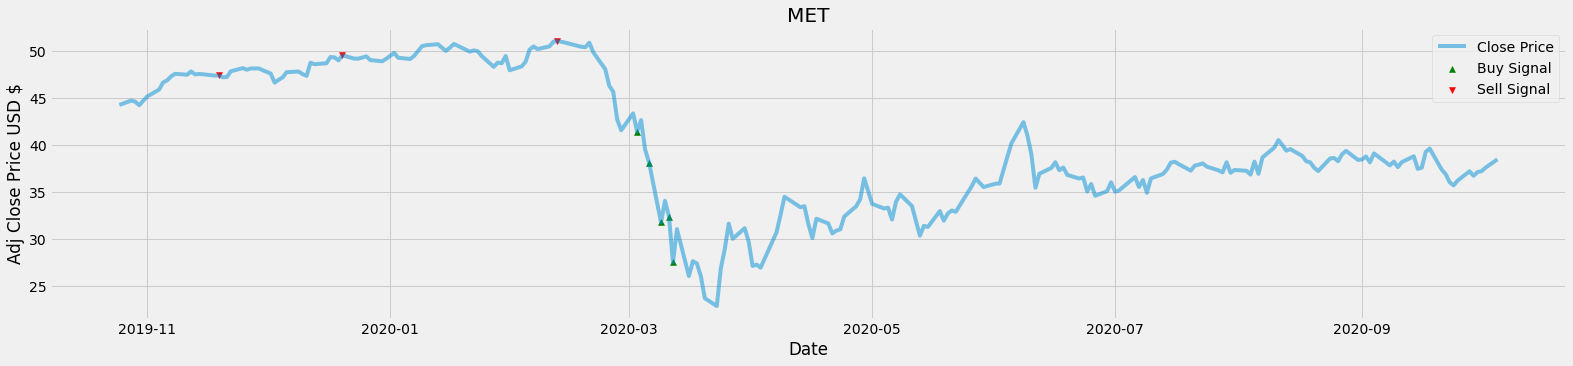

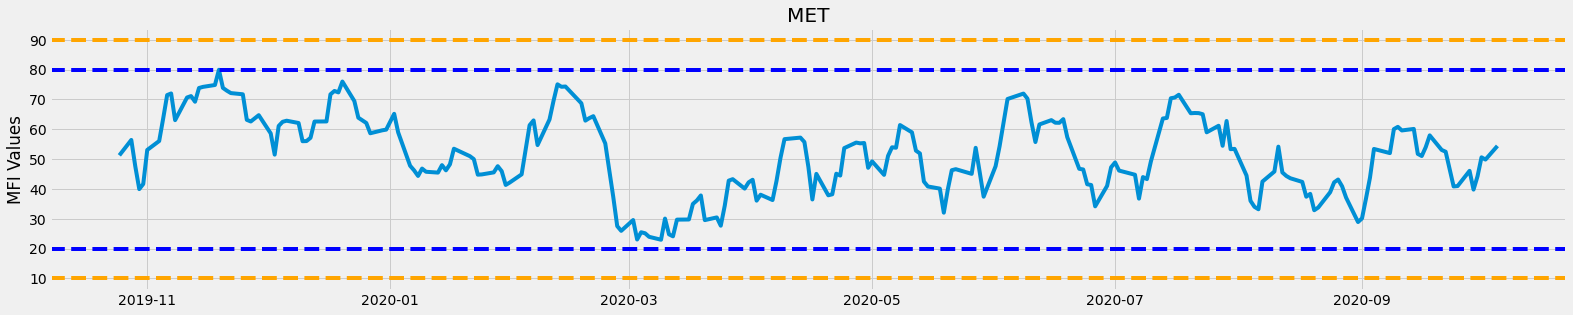

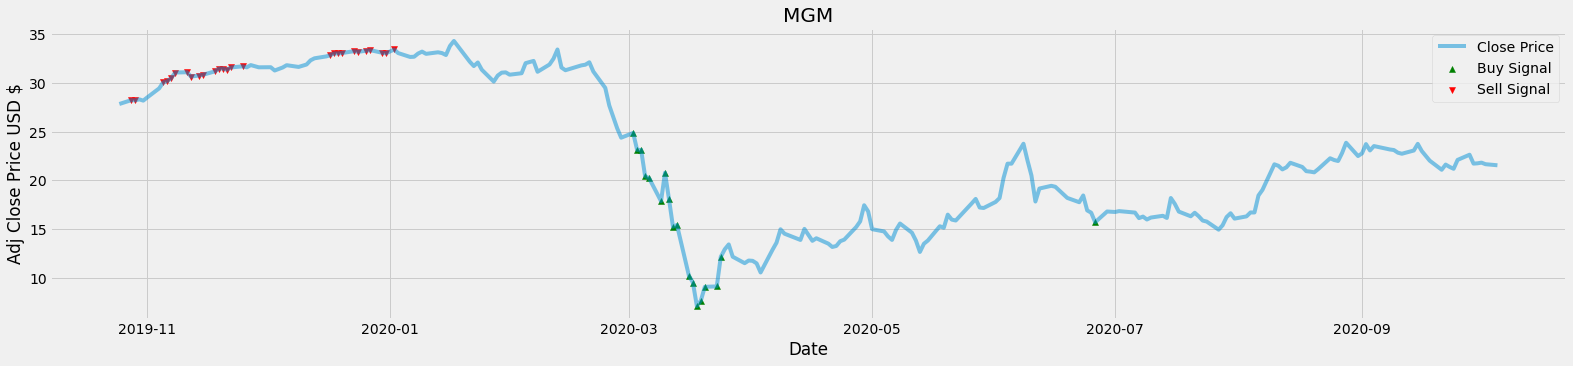

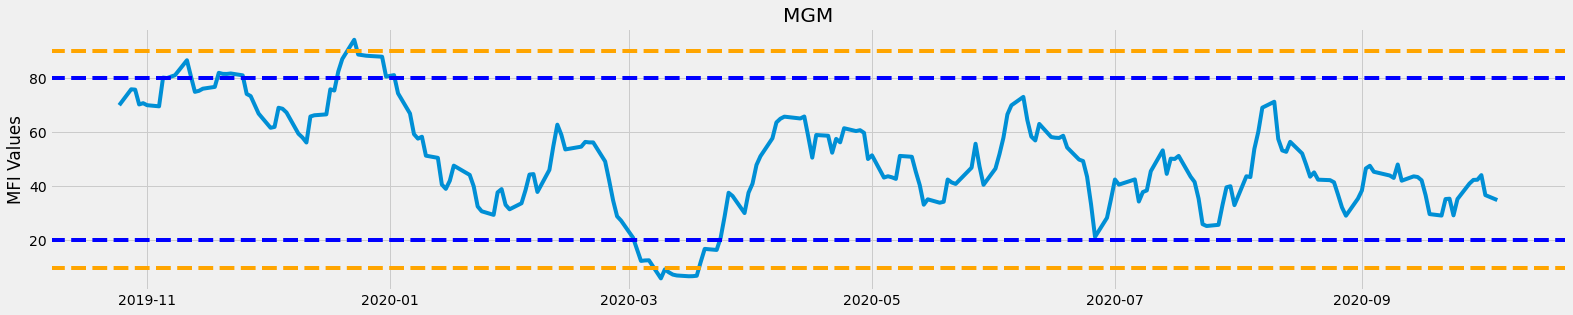

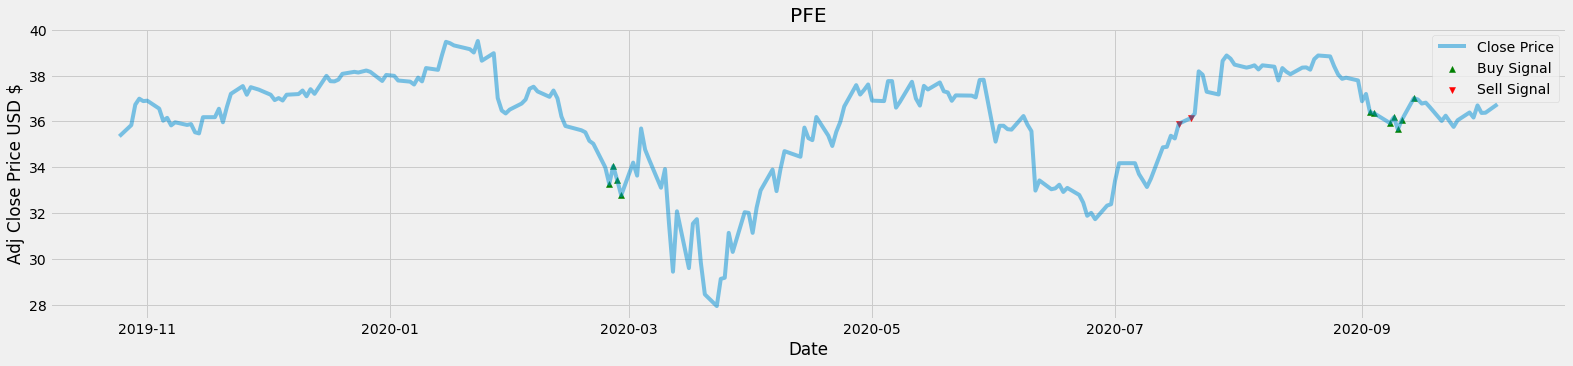

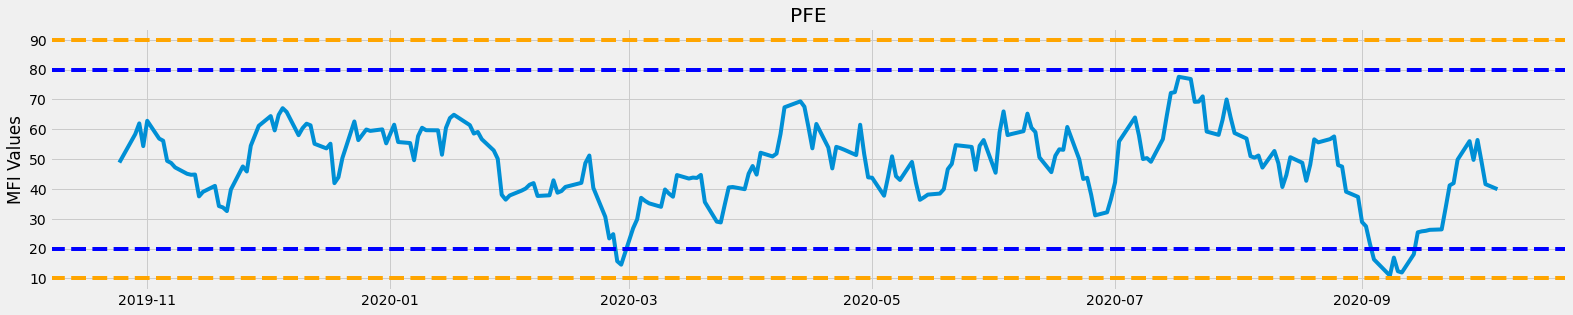

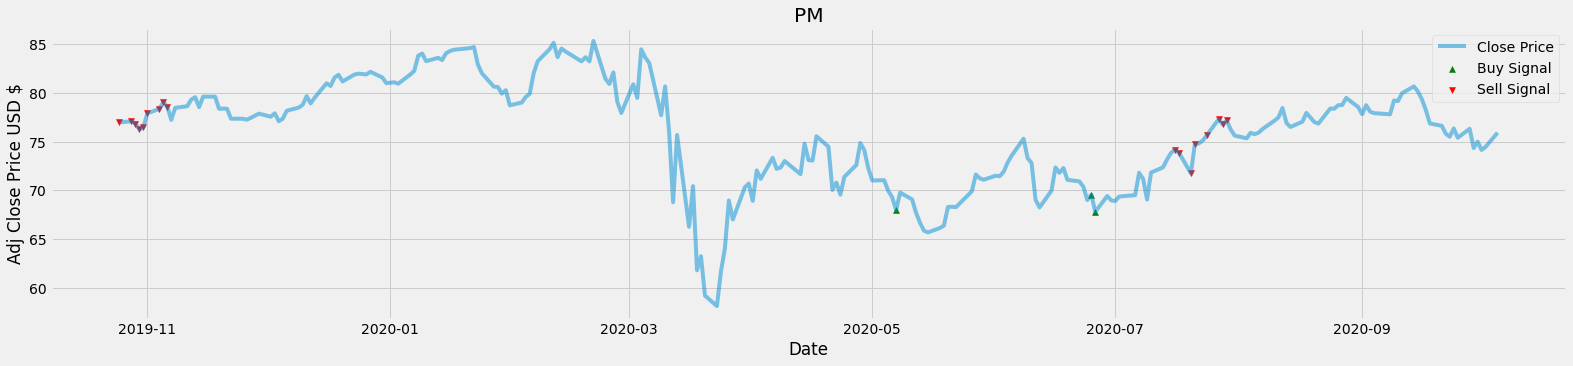

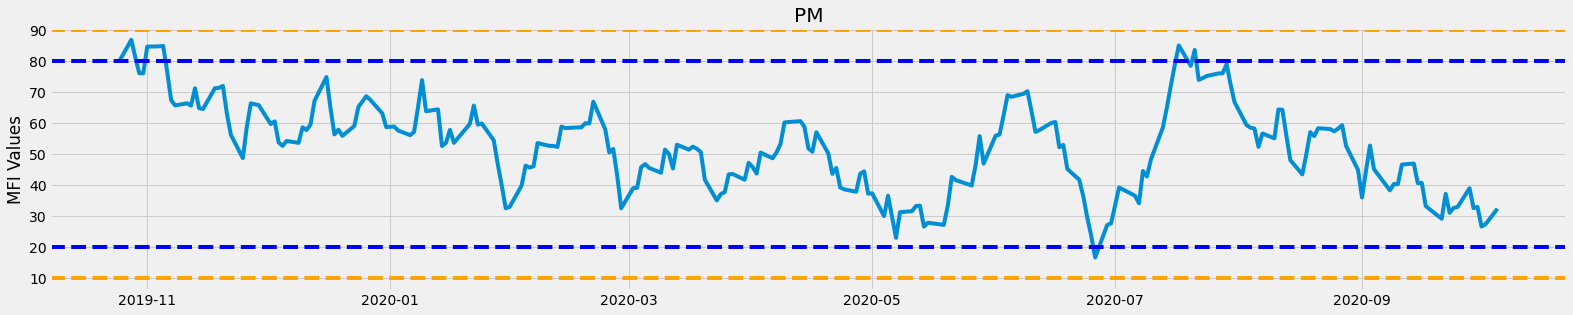

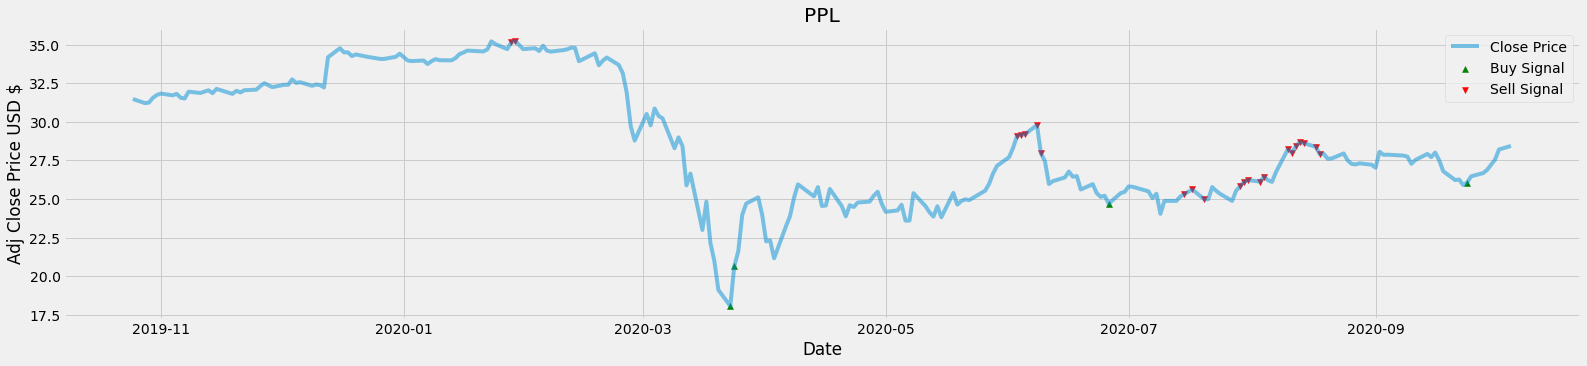

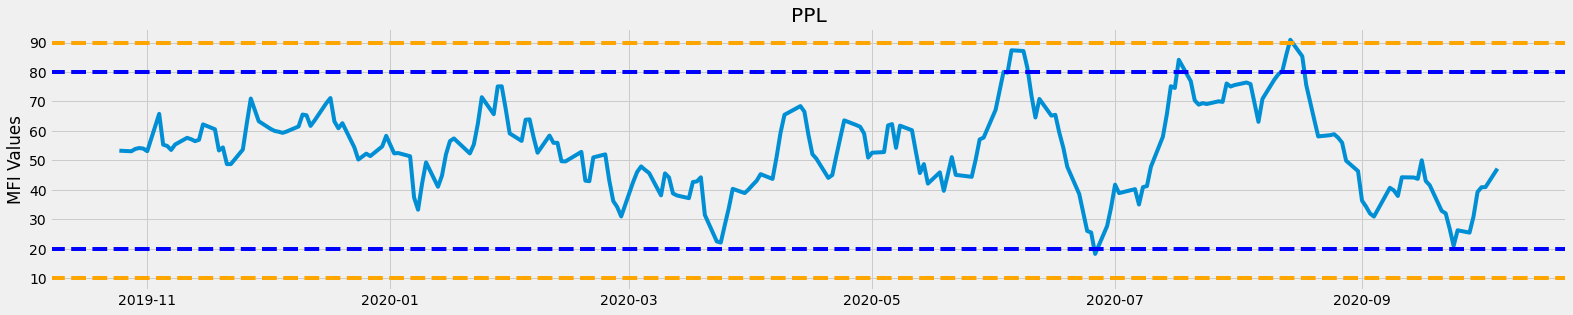

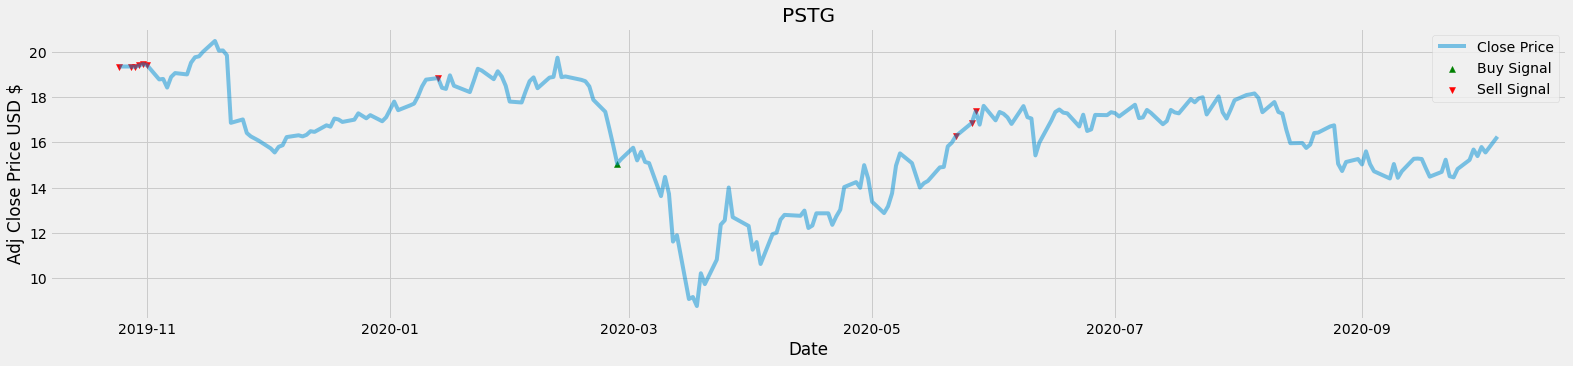

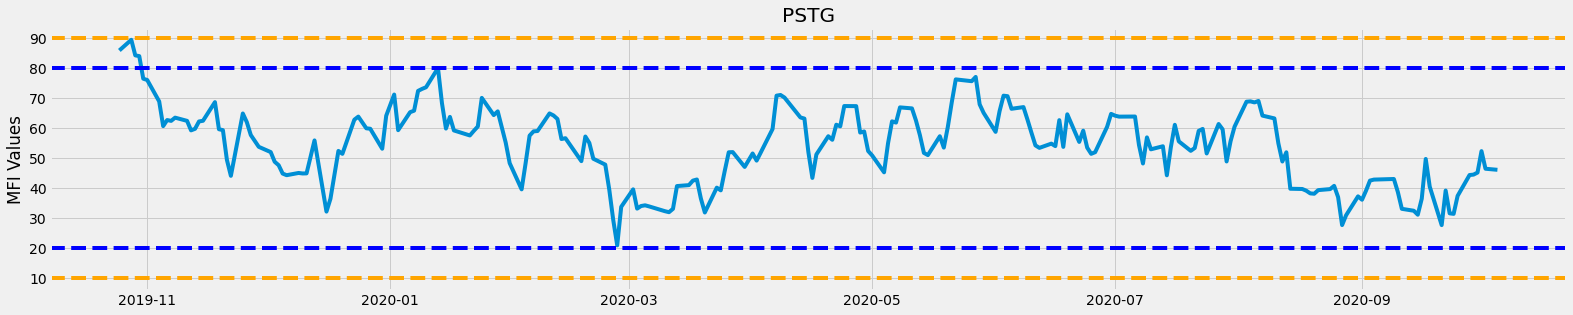

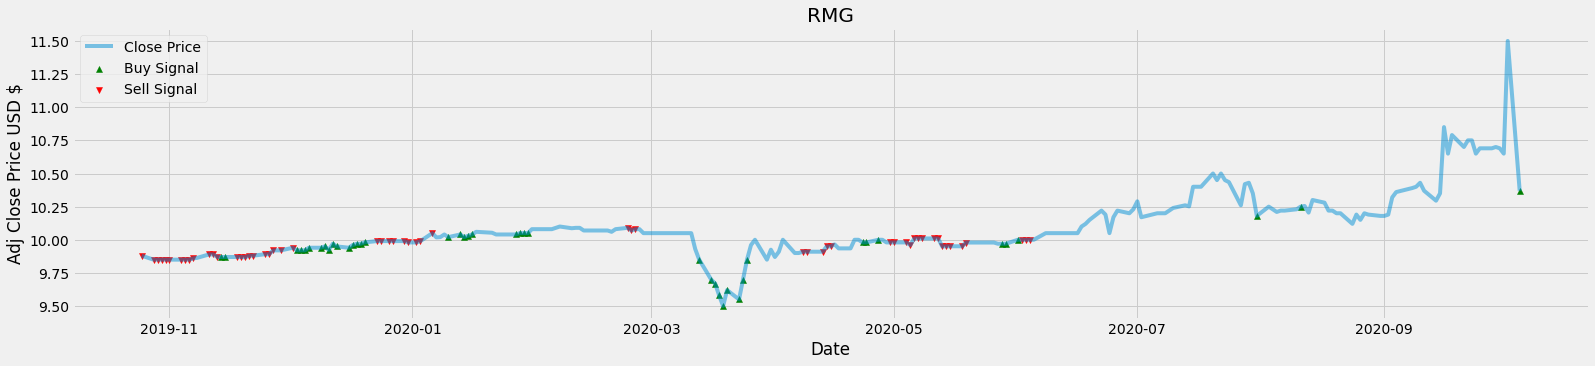

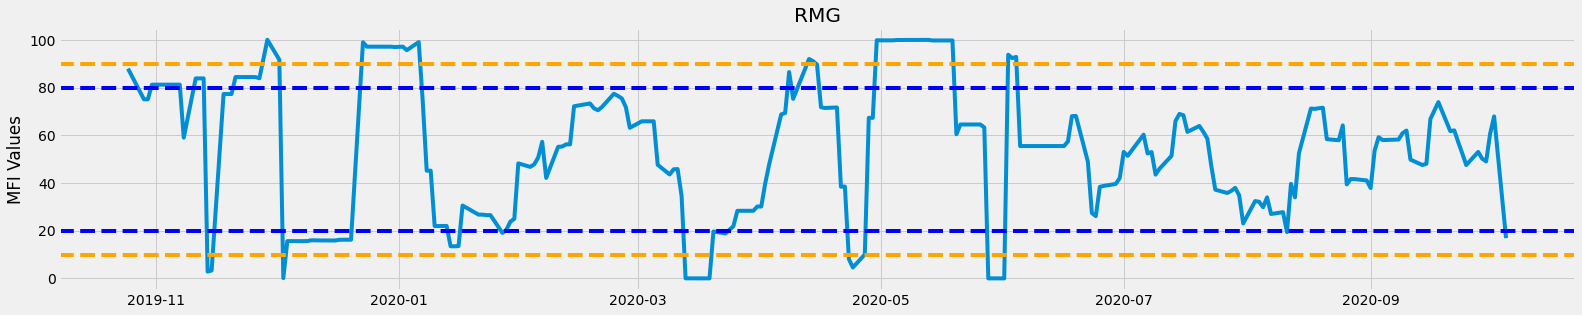

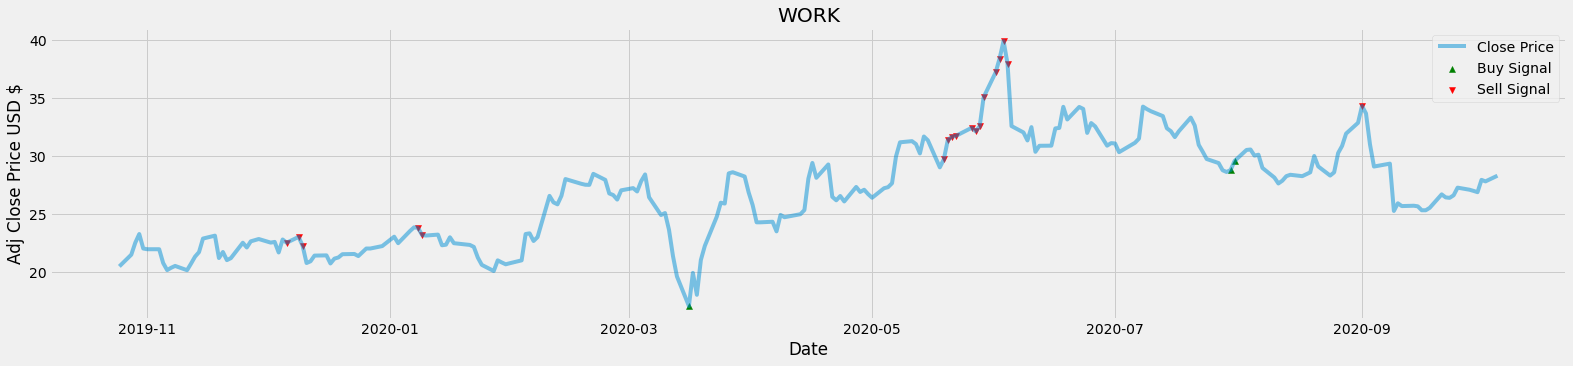

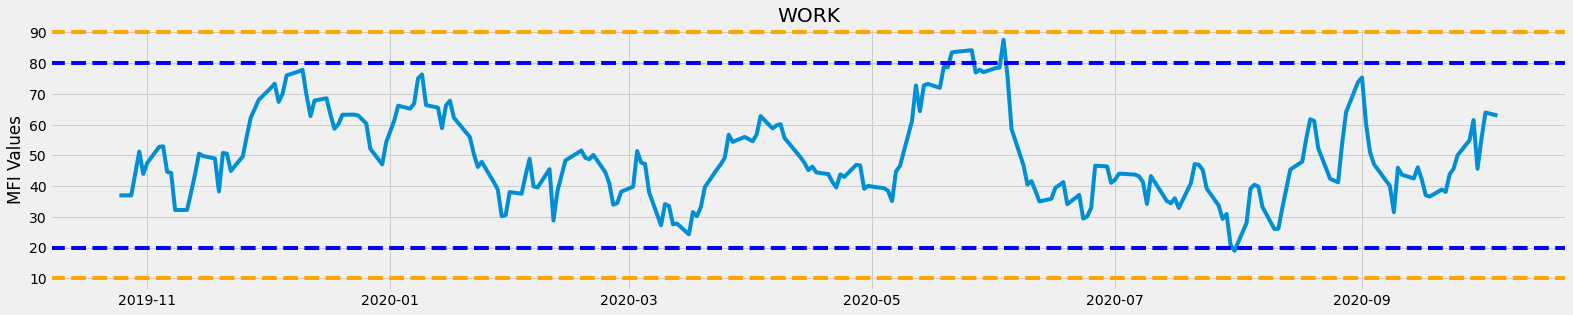

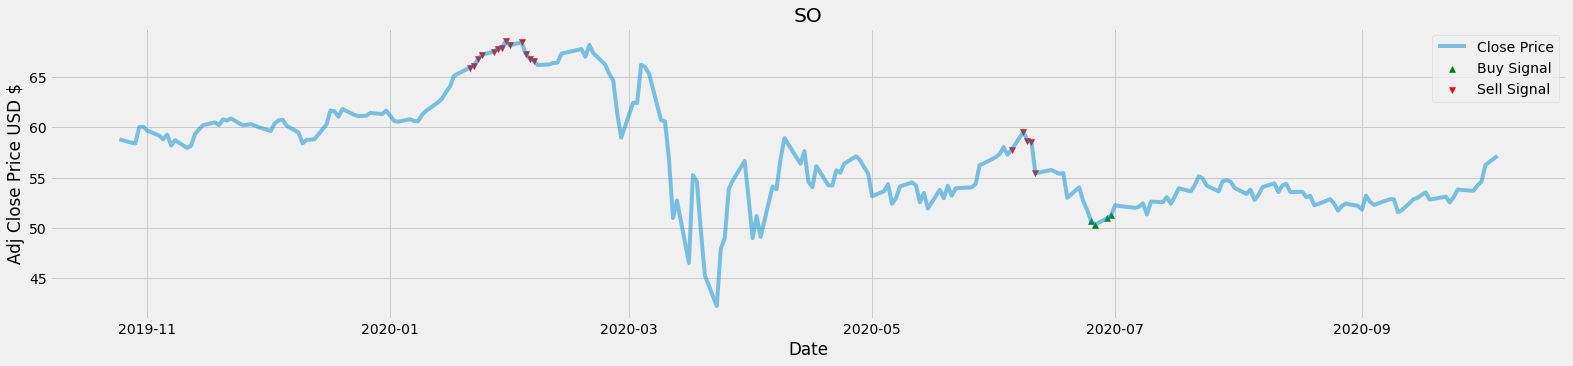

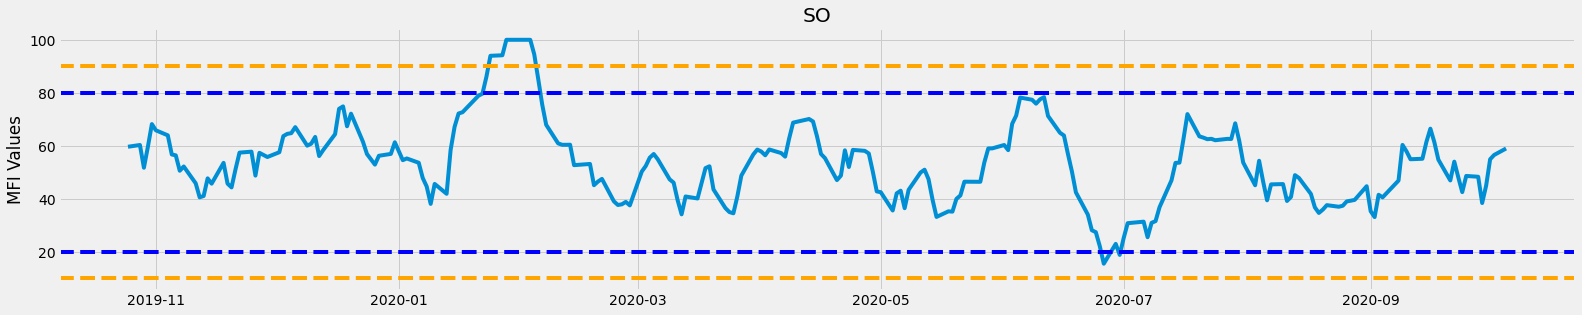

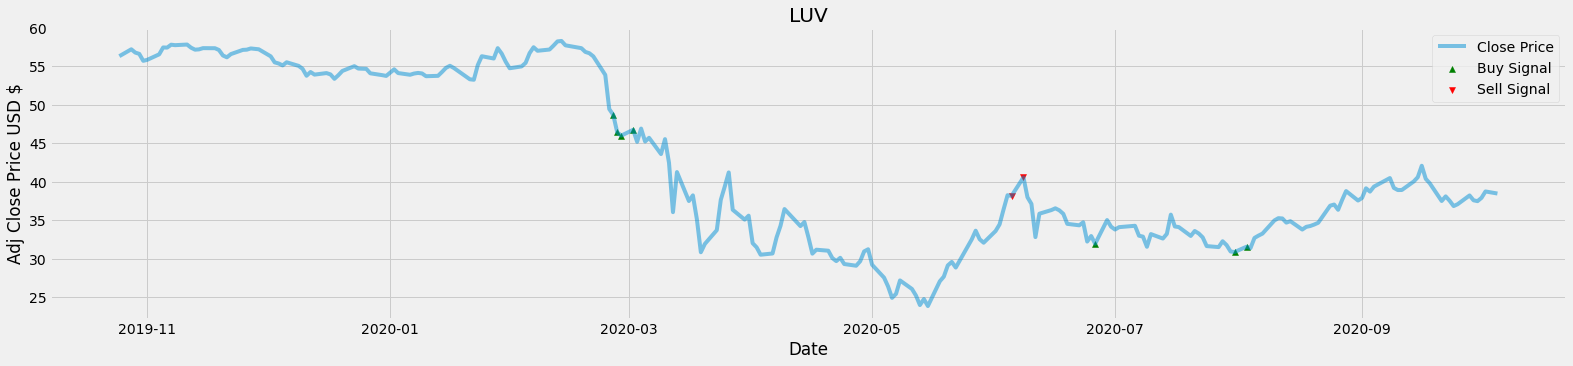

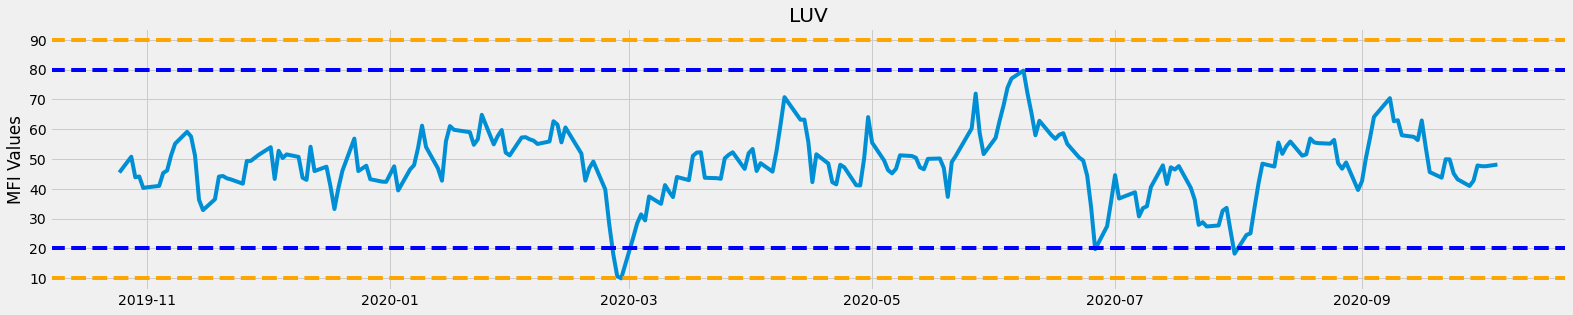

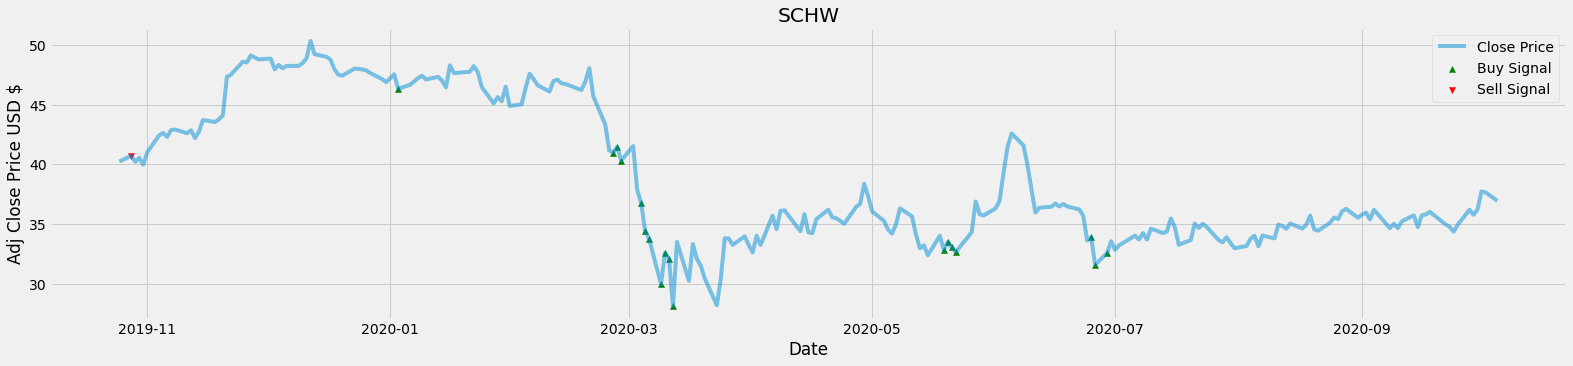

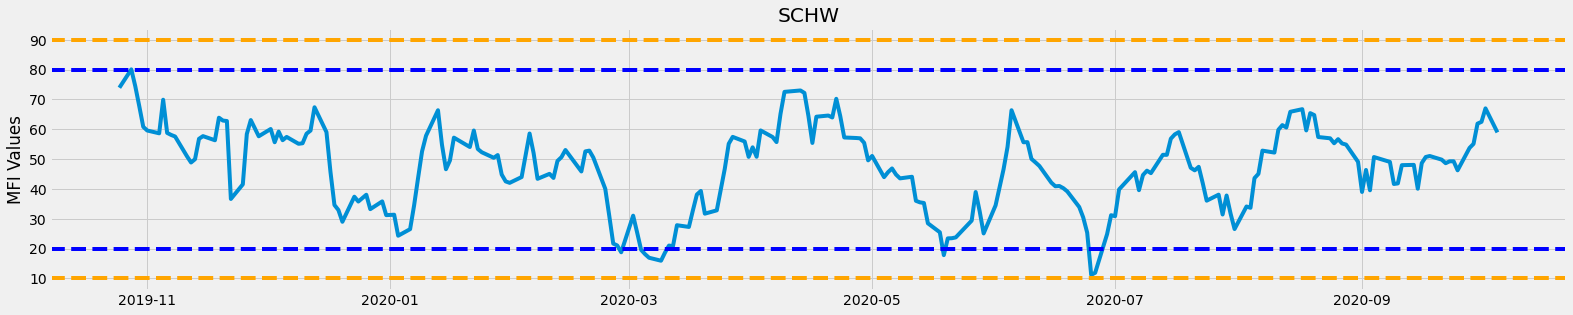

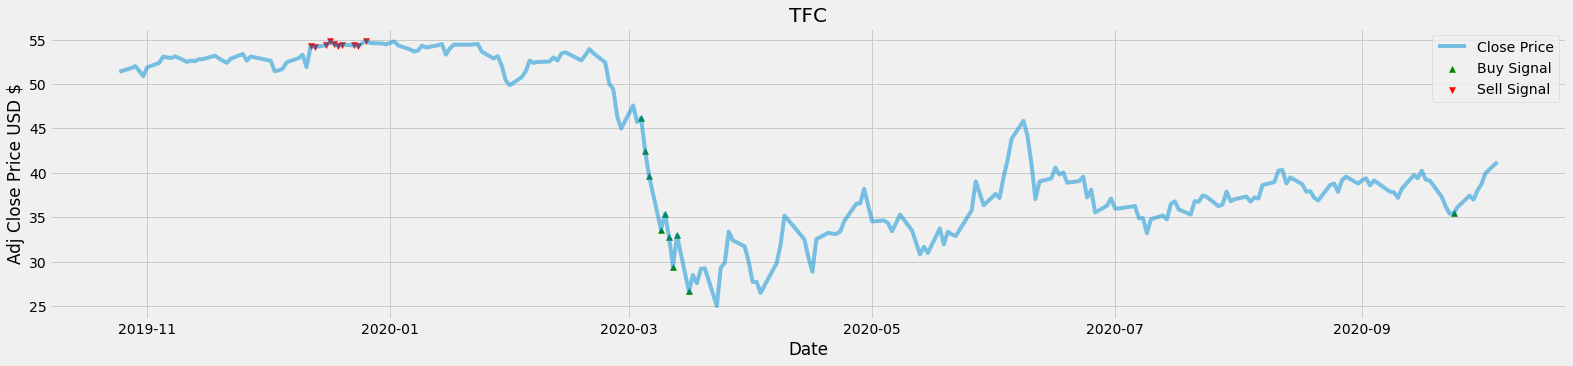

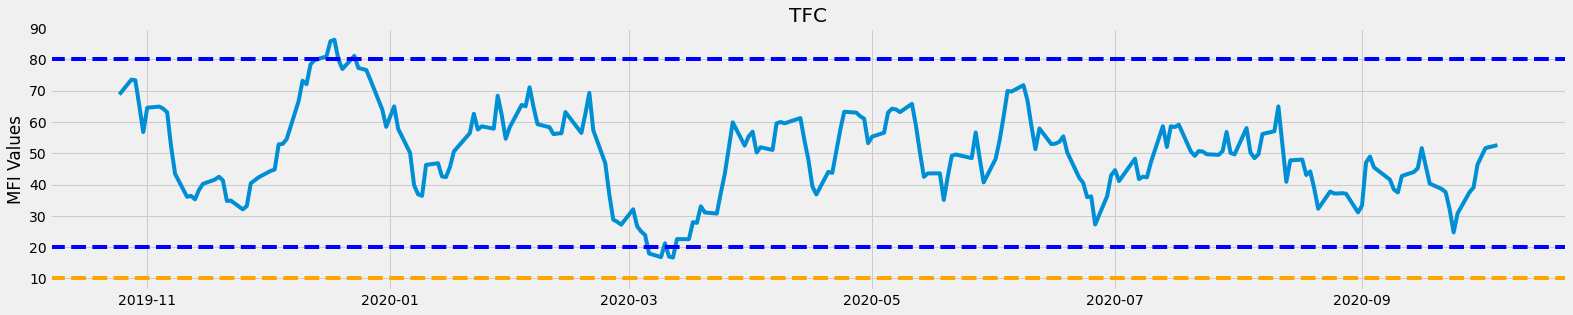

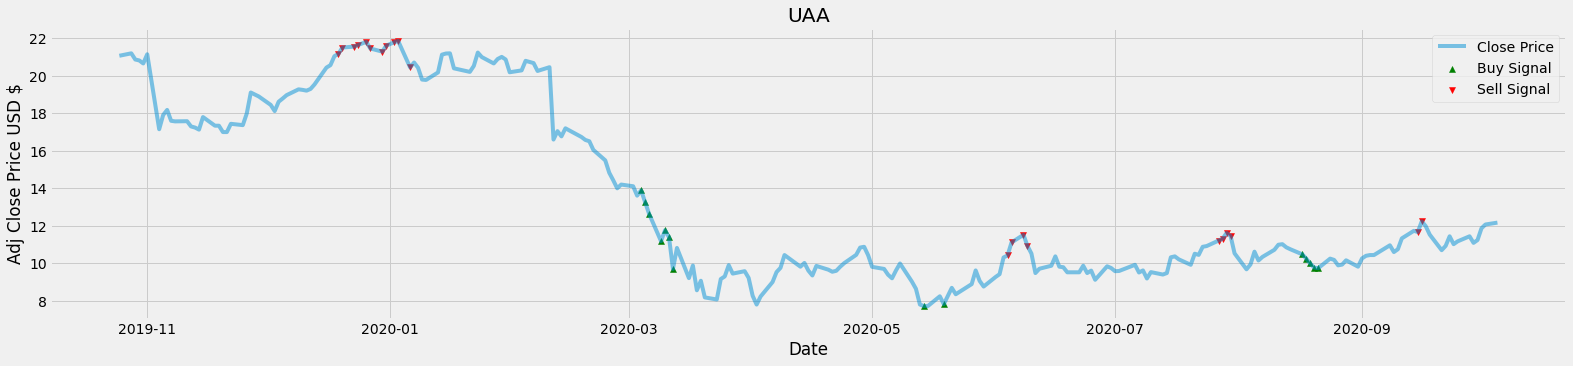

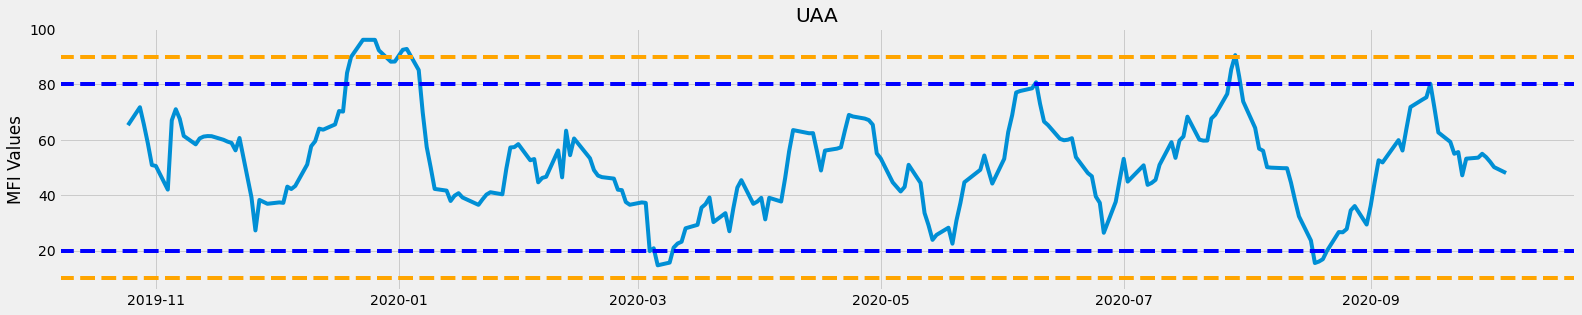

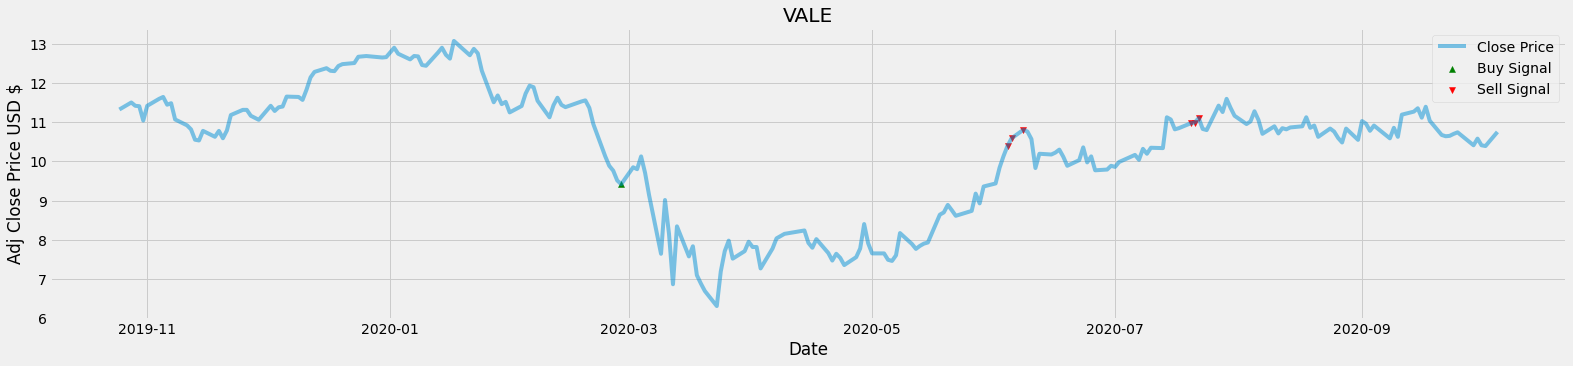

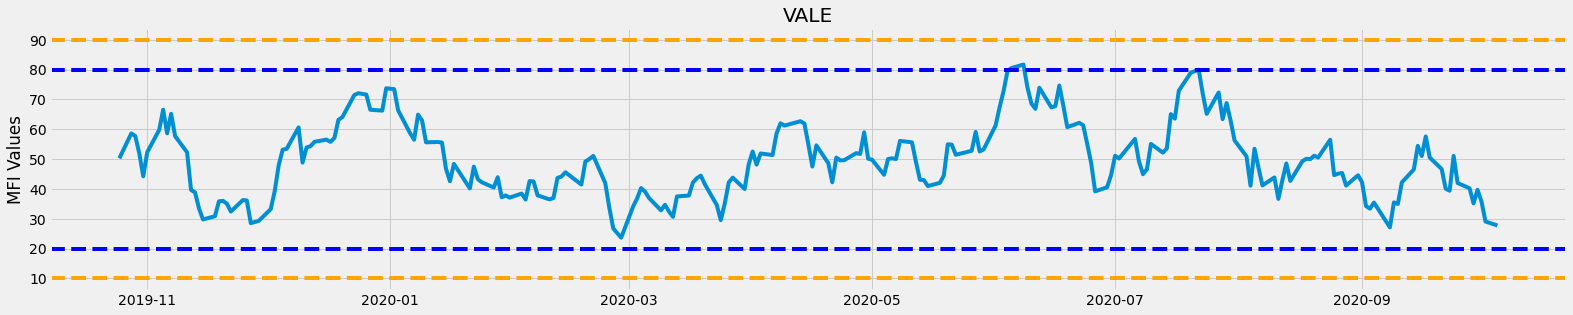

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

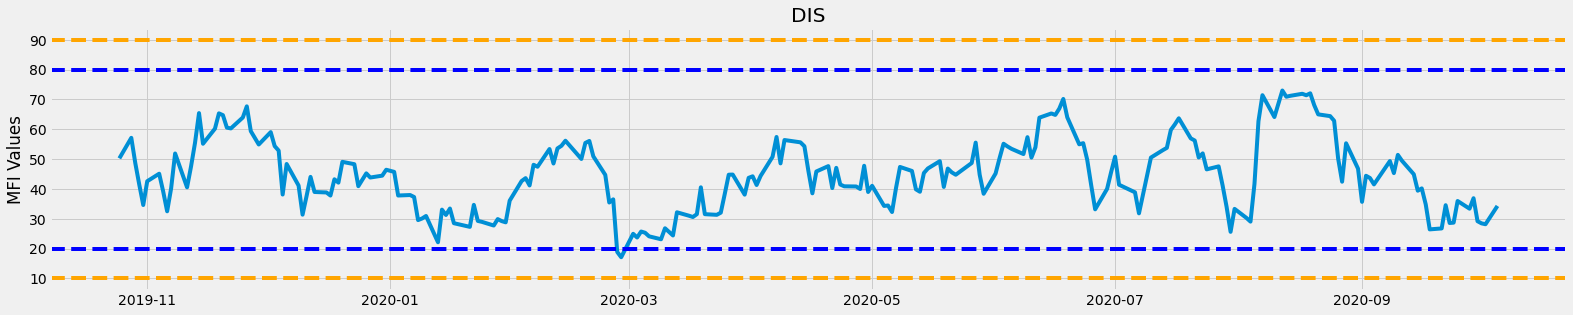

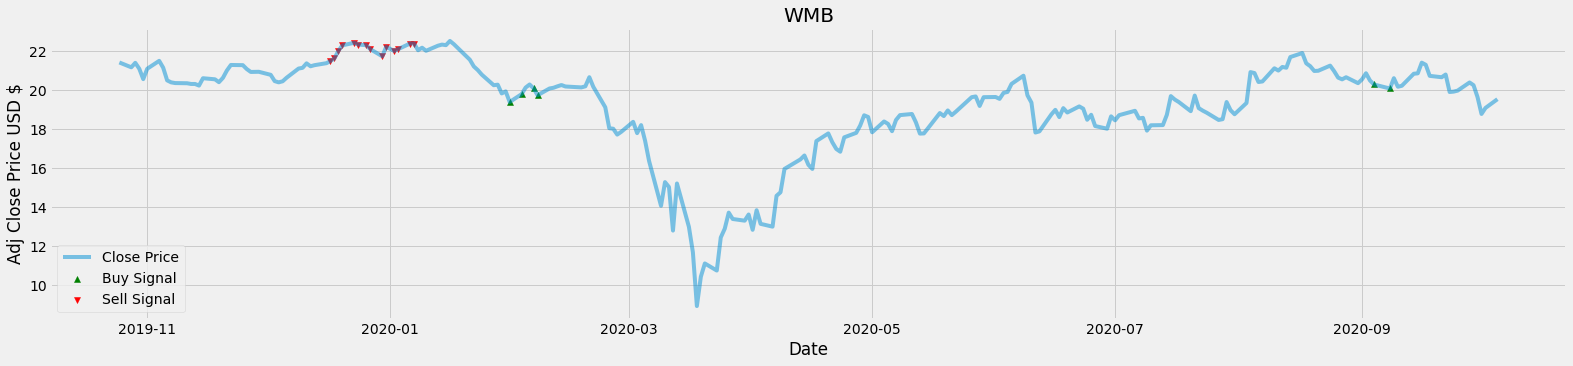

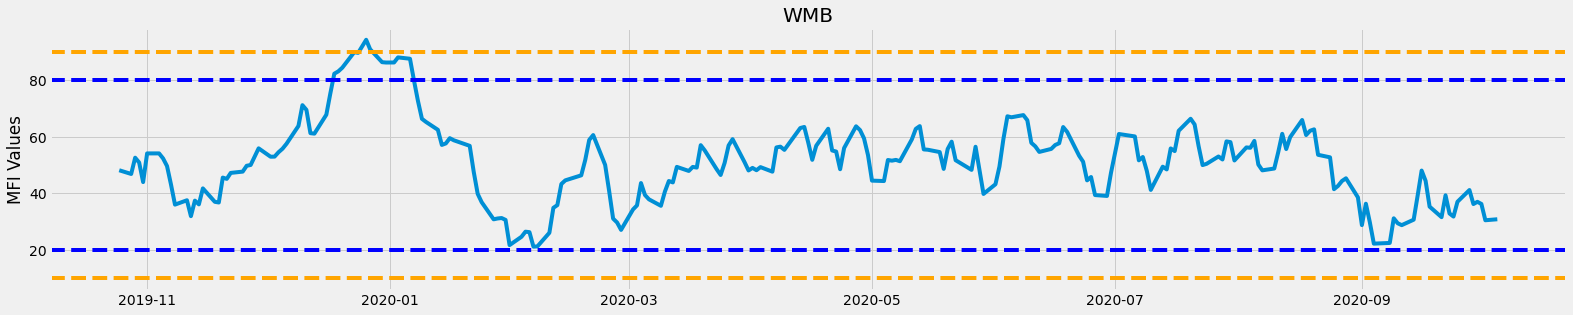

ConversionError: ignored

<Figure size 1742.4x360 with 1 Axes>

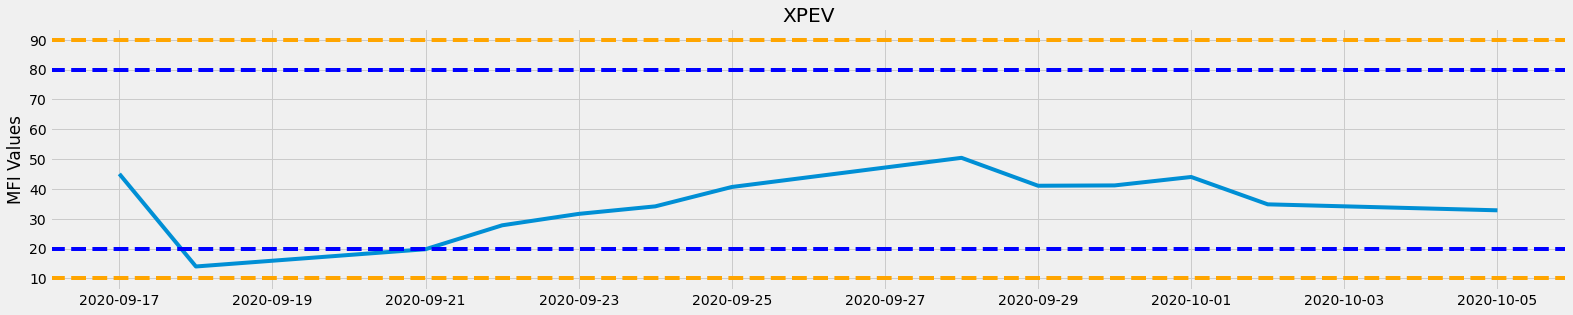

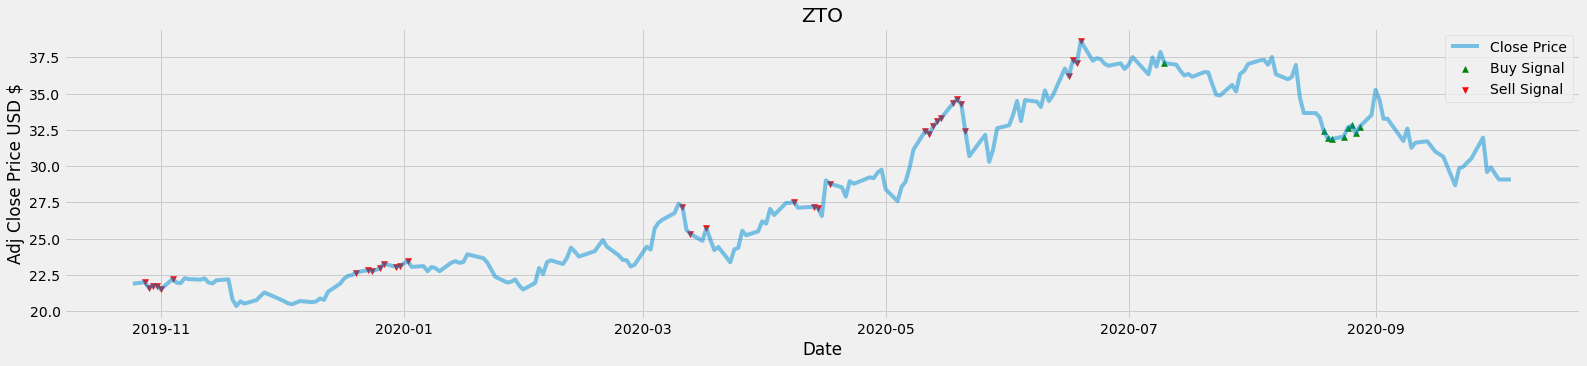

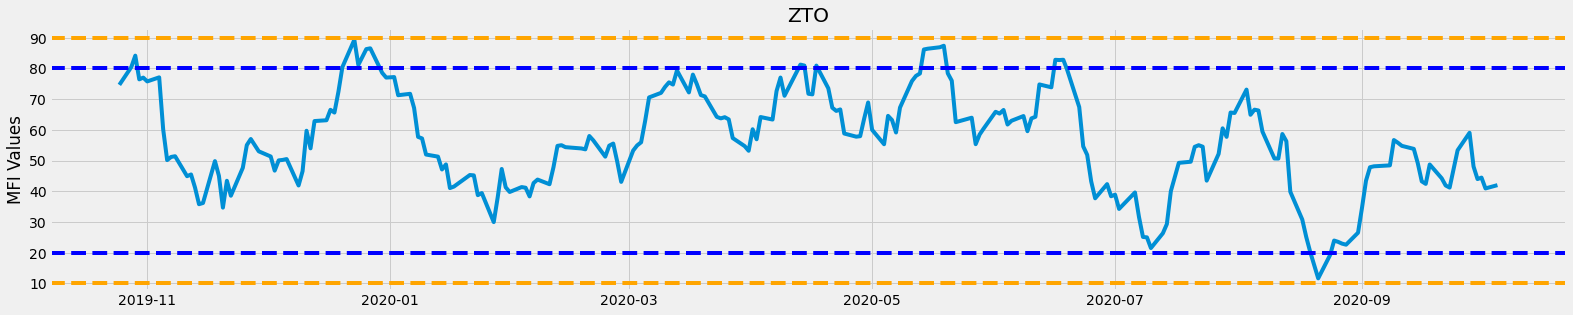

In [ ]:
import warnings
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

today = dt.datetime.now()
start_date = dt.datetime(today.year - 1, today.month, today.day)

stocks = ['AMTD', 'BND', 'DBX', 'EMB', 'IEF', 'IGSB', 'INO', 'KHC', 'NLOK', 
          'PEP', 'SHY', 'TLT', 'USIG', 'WUBA', 'ABBV', 'AEP', 'BSX', 'COG', 
          'CPB', 'CPRI', 'CNC', 'CNP', 'BMY', 'CCXX', 'CFG', 'KO', 'DB', 'AG', 
          'HOG', 'PEAK', 'IVZ', 'JNJ', 'KDP', 'LEVI', 'MPW', 'MRK', 'MET', 
          'MGM', 'PFE', 'PM', 'PPL', 'PSTG', 'RMG', 'WORK', 'SO', 'LUV', 'SCHW',
          'TFC', 'UAA', 'VALE', 'DIS', 'WMB', 'XPEV', 'ZTO']

for stock in stocks:
  df = web.DataReader(stock, 'yahoo', start=start_date)

  typical_price = (df['Adj Close'] + df['High'] + df['Low']) / 3

  period = 14
  money_flow = typical_price * df['Volume']

  # Get all the positive and negative money flows
  positive_flow = []
  negative_flow = []

  # Iterate through the flow
  for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i - 1]:
      positive_flow.append(money_flow[i-1])
      negative_flow.append(0)
    elif typical_price[i] < typical_price[i - 1]:
      positive_flow.append(0)
      negative_flow.append(money_flow[i-1])
    else:
      positive_flow.append(0)
      negative_flow.append(0)
    
  # Get all the positive and negative money flows within the time period
  positive_mf = []
  negative_mf = []

  for i in range(period - 1, len(positive_flow)):
    positive_mf.append(sum(positive_flow[i + 1 - period : i + 1]))
  for i in range(period - 1, len(negative_flow)):
    negative_mf.append(sum(negative_flow[i + 1 - period : i + 1]))

  # Calculate the MFI
  mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))

  # Visually represent the MFI
  # df2 = pd.DataFrame()
  # df2['MFI'] = mfi

  new_df = pd.DataFrame()
  new_df = df[period:]
  new_df['MFI'] = mfi

  # Create function to create buy and sell signals
  def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
    for i in range(len(data['MFI'])):
      if data['MFI'][i] > high:
        buy_signal.append(np.nan)
        sell_signal.append(data['Adj Close'][i])
      elif data['MFI'][i] < low:
        sell_signal.append(np.nan)
        buy_signal.append(data['Adj Close'][i])
      else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

  # Add new columns (buy, sell)
  new_df['Buy'], new_df['Sell'] = get_signal(new_df, 75,25)

  plt.figure(figsize=(24.2,5))
  plt.plot(new_df['Adj Close'], label='Close Price', alpha=0.5)
  plt.scatter(new_df.index, new_df['Buy'], color='green',label='Buy Signal', marker='^', alpha=1.0)
  plt.scatter(new_df.index, new_df['Sell'], color='red',label='Sell Signal', marker='v', alpha=1.0)
  plt.title(stock)
  plt.xlabel('Date')
  plt.ylabel('Adj Close Price USD $')
  plt.legend()
  plt.show()

  plt.figure(figsize=(24.2,4.5))
  plt.plot(new_df['MFI'], label='MFI')
  plt.title(stock)
  plt.ylabel('MFI Values')
  plt.axhline(10, linestyle='--', color='orange')
  plt.axhline(20, linestyle='--', color='blue')
  plt.axhline(80, linestyle='--', color='blue')
  plt.axhline(90, linestyle='--', color='orange')
  plt.show()